# Survival of Titanic Pasengers: Developing Predictive Machine Learning Models 

## Steps to Follow

1. Basic data exploration
2. EDA
3. Data Processing
    1. Handling missing values
    2. Clean the data
    3. Data encoder
    4. Data scaling
4. Version 1
    1. Logistic Regression
        1. Model development
        2. Model evaluation
        3. Results for submission
        4. Statmodels model and results
    2. XGradientBoost
        1. Model development
        2. Model evaluation
        3. Results for submission
    3. Support Vector Classifier(SVC)
        1. Model development
        2. Model evaluation
        3. Results for submission
    4. Random Forest
        1. Model development
        2. Model evaluation
        3. Results for submission
5. Version 2: Feature engineering
    1. Data processing
    2. Logistic regression
    3. XGradientBoost
    4. Support Vector Classifier(SVC)
    5. Random Forest
6. Version 3: Feature engineering-V2
    1. Data processing
    2. Logistic regression
    3. XGradientBoost
    4. Support Vector Classifier(SVC)
    5. Random Forest
6. Version 4: Hyperparameter Tuning-Cross Validation
    1. Grid Search
    2. Random Search

## Basic data exploration

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
# load data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
test_ids = test["PassengerId"]

In [217]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [220]:
# Get the number of missing values for each column
missing_values = train.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [222]:
# Get the number of missing values for each column
missing_values = test.isnull().sum()
missing_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [223]:
# Count the number of unique values in each column
unique_counts = train.nunique()
unique_counts

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [224]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [225]:
# Generate descriptive statistics for object-type columns 
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [226]:
#overall survival rates
survival_counts = train['Survived'].value_counts(normalize=True) * 100
print(f"Survived: {survival_counts[1]:.2f}%")
print(f"Not Survived: {survival_counts[0]:.2f}%")

Survived: 38.38%
Not Survived: 61.62%


In [227]:
# Creating a pivot table that calculates the mean values of 'Age', 'SibSp', 'Parch', 'Fare', and 'Pclass'
# for each 'Survived' status (0 = Not Survived, 1 = Survived)
survival_pivot = pd.pivot_table(train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'], aggfunc='mean')

# Display the table
print(survival_pivot)

                Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.626179  22.117887  0.329690  2.531876  0.553734
1         28.343690  48.395408  0.464912  1.950292  0.473684


In [228]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare','Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


In [229]:
train.groupby(['Pclass'], as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [230]:
train.groupby(['Sex'], as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [231]:
train.groupby(['Parch'], as_index = False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [232]:
train.groupby(['Embarked'], as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [233]:
# Calculate the survival percentages by categorical variables
pclass_pct = pd.crosstab(train['Survived'], train['Pclass'], normalize='columns') * 100
sex_pct = pd.crosstab(train['Survived'], train['Sex'], normalize='columns') * 100
embarked_pct = pd.crosstab(train['Survived'], train['Embarked'], normalize='columns') * 100

# Round the percentages to 2 decimal places
pclass_pct = pclass_pct.round(2)
sex_pct = sex_pct.round(2)
embarked_pct = embarked_pct.round(2)

# Display the results
print("Survival Percentage by Pclass:")
print(pclass_pct)
print("\nSurvival Percentage by Sex:")
print(sex_pct)
print("\nSurvival Percentage by Embarked:")
print(embarked_pct)

Survival Percentage by Pclass:
Pclass        1      2      3
Survived                     
0         37.04  52.72  75.76
1         62.96  47.28  24.24

Survival Percentage by Sex:
Sex       female   male
Survived               
0           25.8  81.11
1           74.2  18.89

Survival Percentage by Embarked:
Embarked      C      Q     S
Survived                    
0         44.64  61.04  66.3
1         55.36  38.96  33.7


## EDA

In [234]:
# Create a pivot table to calculate survival rate by gender
survival_rate_pivot = train.pivot_table(values='Survived', index='Sex', aggfunc='mean') * 100

# Rename the column for clarity
survival_rate_pivot.columns = ['Survival Rate (%)']

# Display the pivot table
print(survival_rate_pivot)

        Survival Rate (%)
Sex                      
female          74.203822
male            18.890815


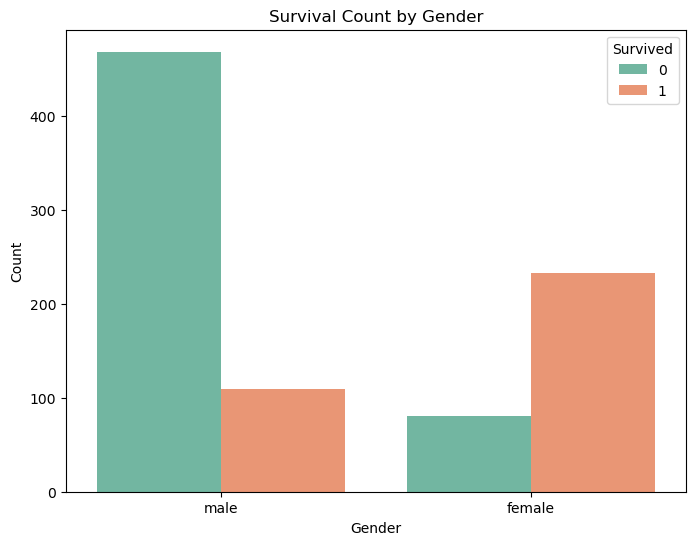

In [235]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=train, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

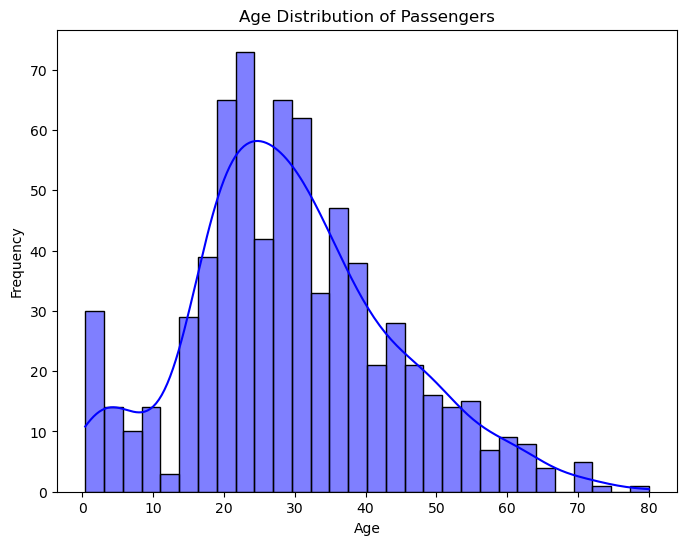

In [236]:
#age distribution
plt.figure(figsize=(8,6))
sns.histplot(train['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

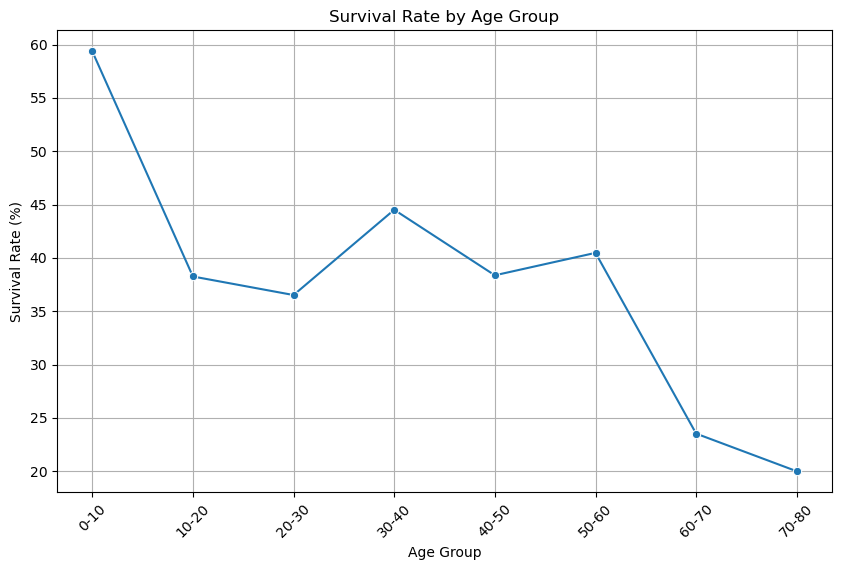

In [237]:
# Bin the age data into ranges (e.g., 0-10, 10-20, etc.)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
train['AgeGroup'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)

# Calculate survival rates by age group
survival_rate_by_age = train.groupby('AgeGroup')['Survived'].mean() * 100

# Create a DataFrame for plotting
survival_rate_df = survival_rate_by_age.reset_index()
survival_rate_df.columns = ['Age Group', 'Survival Rate (%)']

# Plot the survival rate by age group
plt.figure(figsize=(10, 6))
sns.lineplot(data=survival_rate_df, x='Age Group', y='Survival Rate (%)', marker='o')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

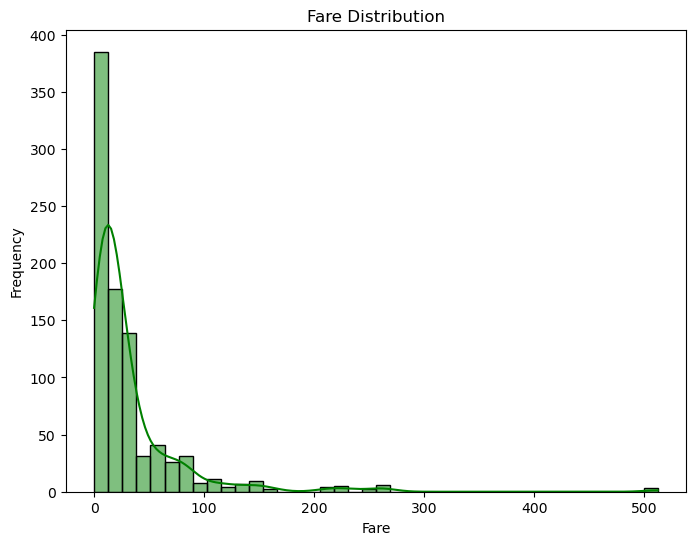

In [238]:
#fare distribution
plt.figure(figsize=(8,6))
sns.histplot(train['Fare'], kde=True, bins=40, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


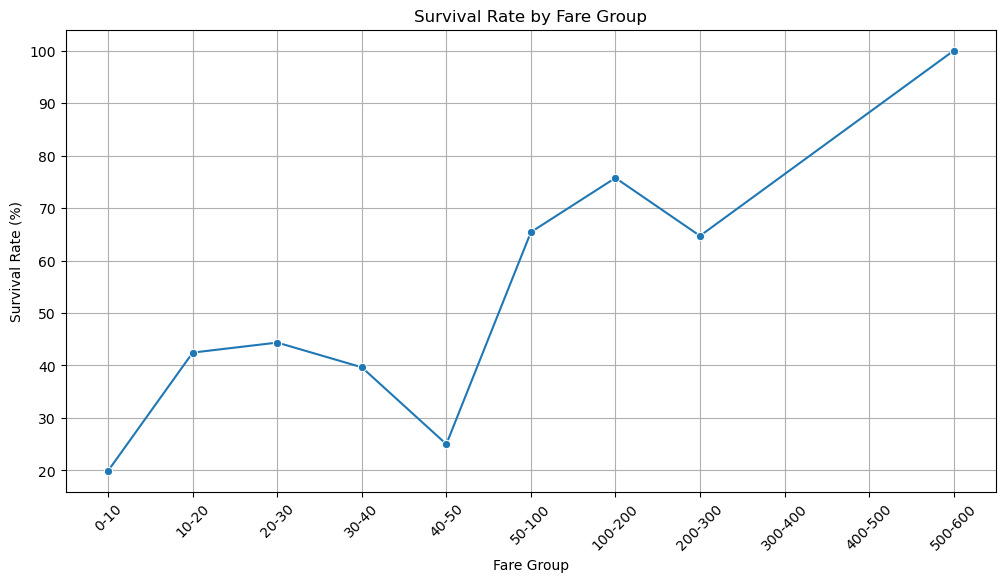

In [239]:
# Bin the fare data into ranges (e.g., 0-10, 10-20, etc.)
# fare_bins = [-0.01, 25, 50, 100, 200, 300, 600]
# fare_labels = ['0-25', '25-50', '50-100', '100-200', '200-300', '300+']
fare_bins = [-0.01, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600]
fare_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600']

train['FareGroup'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels)

# Calculate survival rates by fare group
survival_rate_by_fare = train.groupby('FareGroup')['Survived'].mean() * 100

# Create a DataFrame for plotting
survival_rate_df = survival_rate_by_fare.reset_index()
survival_rate_df.columns = ['Fare Group', 'Survival Rate (%)']

# Plot the survival rate by fare group
plt.figure(figsize=(12, 6))
sns.lineplot(data=survival_rate_df, x='Fare Group', y='Survival Rate (%)', marker='o')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [240]:
# Create a pivot table to get counts of survivors and non-survivors by embarkation point
pivot_table = train.pivot_table(index='Embarked', columns='Survived', aggfunc='size', fill_value=0)

# Calculate the total passengers and the percentage of survival
pivot_table['Total'] = pivot_table[0] + pivot_table[1]
pivot_table['Survival Rate (%)'] = (pivot_table[1] / pivot_table['Total']) * 100

# Select only the survival rate column for the final table
result_table = pivot_table[['Survival Rate (%)']]

# Print the table
print(result_table)

Survived  Survival Rate (%)
Embarked                   
C                 55.357143
Q                 38.961039
S                 33.695652


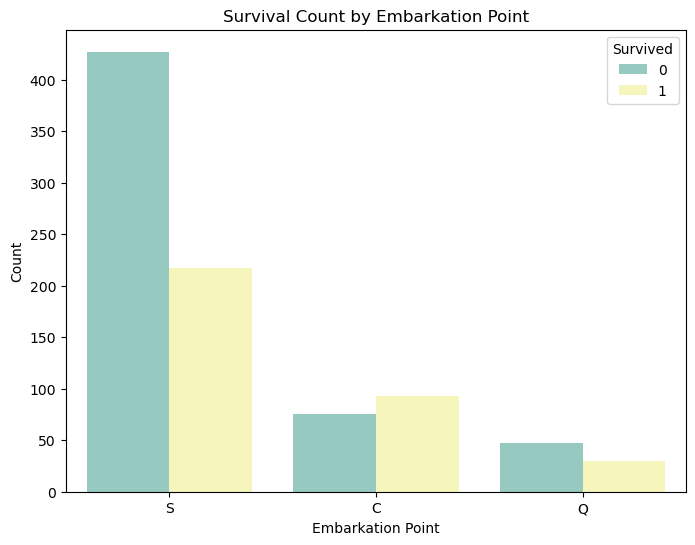

In [241]:
#Survival Count by Embarkation Point
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', hue='Survived', data=train, palette='Set3')
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


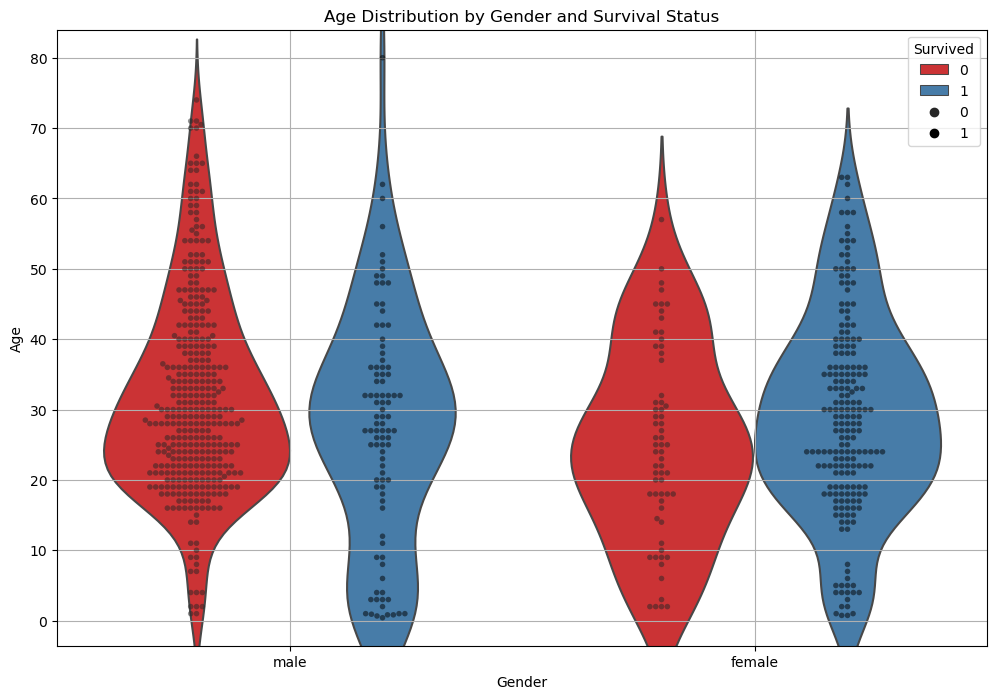

In [242]:
# Create the violin plot with swarm plot for age distribution by gender and survival rates

plt.figure(figsize=(12, 8))

# Violin plot
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, palette='Set1', inner=None)

# Overlay swarm plot with black points
sns.swarmplot(x='Sex', y='Age', hue='Survived', data=train, palette='dark:black', dodge=True, alpha=0.5, marker='o', size=4)

plt.title('Age Distribution by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.grid(True)
plt.show()

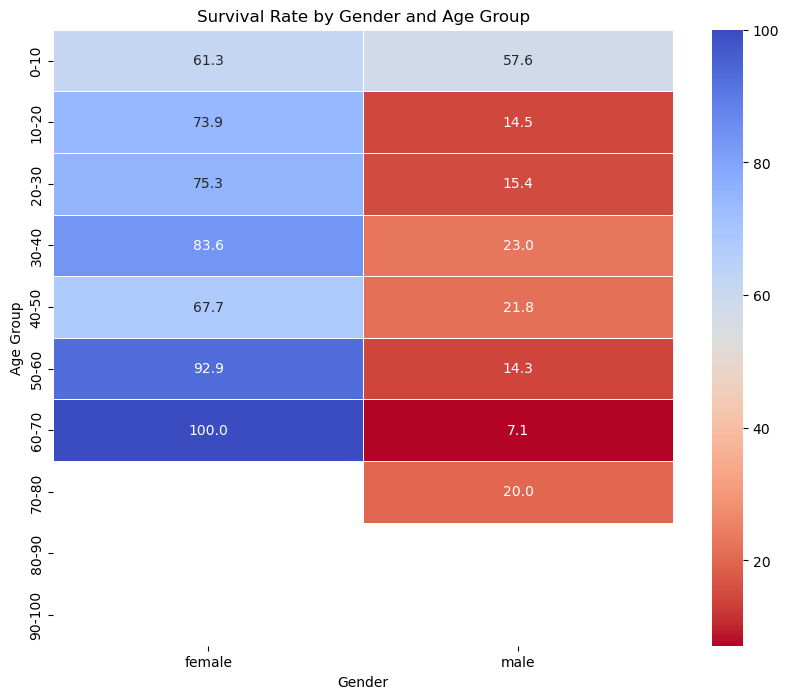

In [243]:
# Calculate counts of survivors and non-survivors for each gender and age group
grouped = train.groupby(['Sex', 'AgeGroup'])['Survived'].agg(['sum', 'count'])
grouped.columns = ['Survived', 'Total']

# Calculate the survival rates as a percentage of the total counts for each gender
grouped['Survival Rate (%)'] = (grouped['Survived'] / grouped['Total']) * 100

# Reset index to create a DataFrame suitable for pivoting
survival_rate_df = grouped.reset_index()
survival_rate_df = survival_rate_df[['Sex', 'AgeGroup', 'Survival Rate (%)']]

# Pivot the table for heatmap
pivot_table = survival_rate_df.pivot(index='AgeGroup', columns='Sex', values='Survival Rate (%)')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm_r', fmt='.1f', linewidths=.5)
plt.title('Survival Rate by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

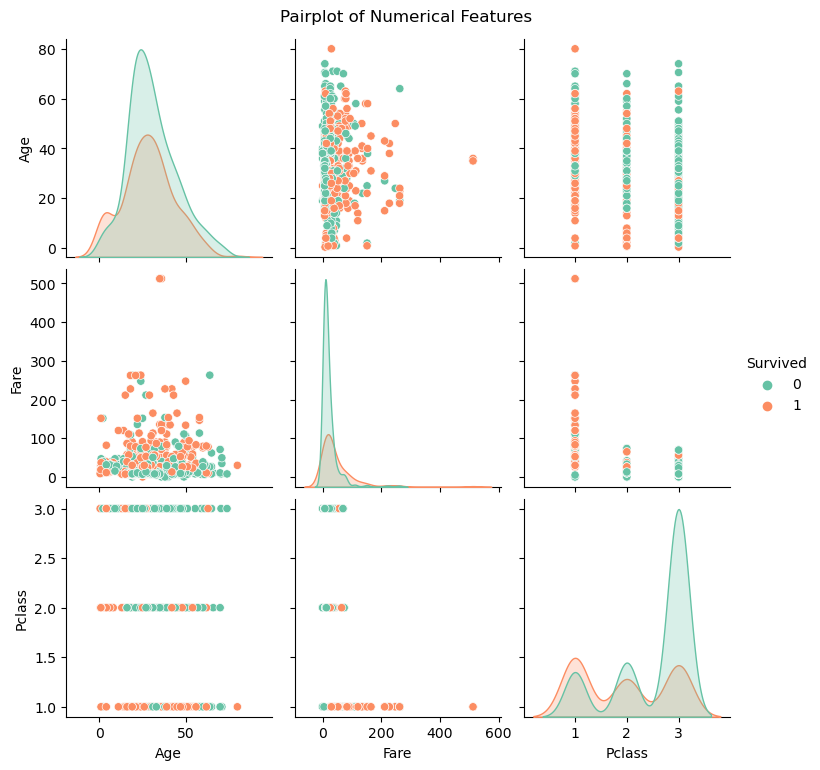

In [244]:
# Create a pairplot of numerical features to visualise the relationships and distributions
# between pairs of features, with 'Survived' as the hue to differentiate by survival status
sns.pairplot(train[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='Set2')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

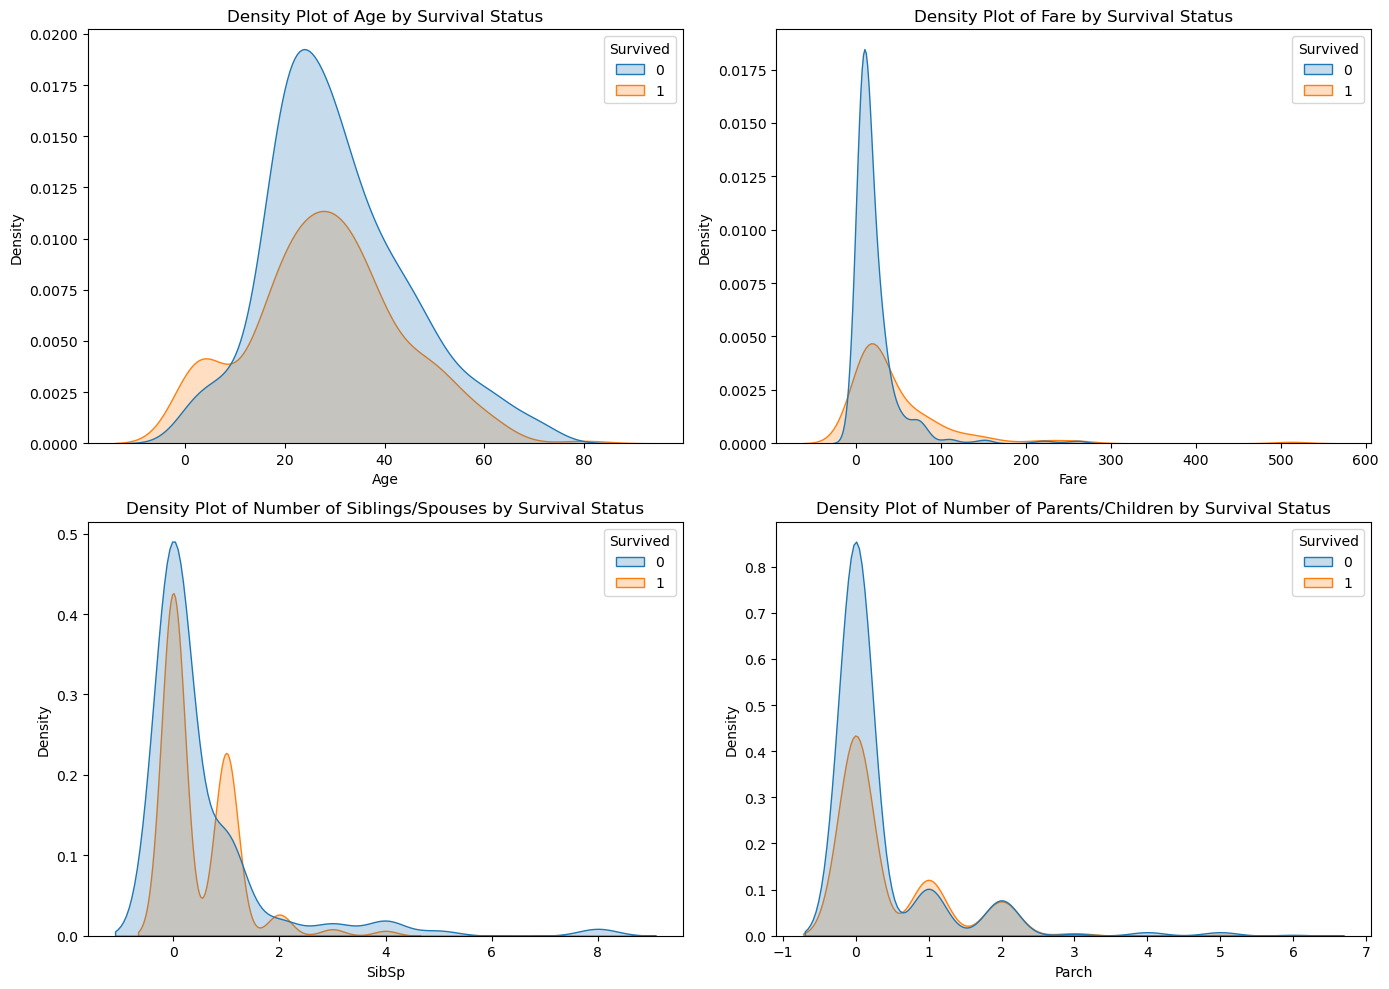

In [245]:
#age, fare, sibsp and parch istributions
# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot density plot for Age
sns.kdeplot(data=train, x='Age', hue='Survived', fill=True, ax=axs[0, 0])
axs[0, 0].set_title('Density Plot of Age by Survival Status')

# Plot density plot for Fare
sns.kdeplot(data=train, x='Fare', hue='Survived', fill=True, ax=axs[0, 1])
axs[0, 1].set_title('Density Plot of Fare by Survival Status')

# Plot density plot for SibSp (Number of siblings/spouses)
sns.kdeplot(data=train, x='SibSp', hue='Survived', fill=True, ax=axs[1, 0])
axs[1, 0].set_title('Density Plot of Number of Siblings/Spouses by Survival Status')

# Plot density plot for Parch (Number of parents/children)
sns.kdeplot(data=train, x='Parch', hue='Survived', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('Density Plot of Number of Parents/Children by Survival Status')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\kdsha\AppData\Local\Temp\ipykernel_29900\626764523.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap=sns.color_palette("coolwarm_r", as_cmap=True), vmin=-1, linewidths=0.5)


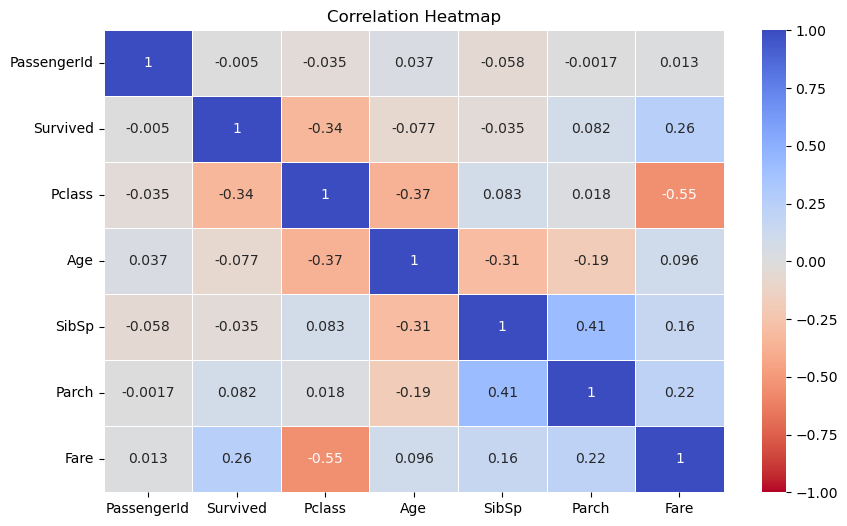

In [246]:
#correlation heatmap for features
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap=sns.color_palette("coolwarm_r", as_cmap=True), vmin=-1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [247]:
# Group by 'SibSp' and 'Survived' to get counts
grouped = train.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)

# Calculate survival rates
grouped['Survival Rate (%)'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Reset index to create a DataFrame suitable for pivoting
survival_rate_df = grouped.reset_index()
survival_rate_df.columns = ['Number of Siblings/Spouses Aboard', 'Not Survived', 'Survived', 'Survival Rate (%)']

# Display the table
print(survival_rate_df[['Number of Siblings/Spouses Aboard', 'Survival Rate (%)']])

   Number of Siblings/Spouses Aboard  Survival Rate (%)
0                                  0          34.539474
1                                  1          53.588517
2                                  2          46.428571
3                                  3          25.000000
4                                  4          16.666667
5                                  5           0.000000
6                                  8           0.000000


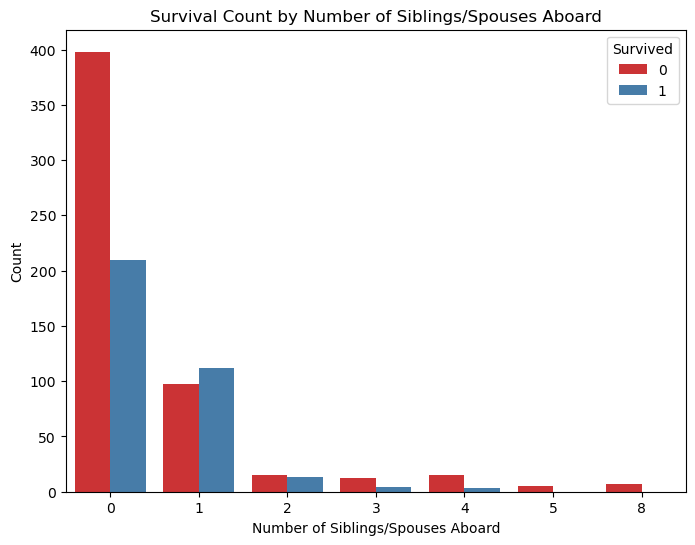

In [248]:
#Survival counts by no of sibilings/spouses abroad

plt.figure(figsize=(8,6))
sns.countplot(x='SibSp', hue='Survived', data=train, palette='Set1')
plt.title('Survival Count by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [249]:
# Group by 'SibSp' and 'Survived' to get counts
grouped = train.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)

# Calculate survival rates
grouped['Survival Rate (%)'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Reset index to create a DataFrame suitable for pivoting
survival_rate_df = grouped.reset_index()
survival_rate_df.columns = ['Number of Parents/Children Aboard', 'Not Survived', 'Survived', 'Survival Rate (%)']

# Display the table
print(survival_rate_df[['Number of Parents/Children Aboard', 'Survival Rate (%)']])

   Number of Parents/Children Aboard  Survival Rate (%)
0                                  0          34.365782
1                                  1          55.084746
2                                  2          50.000000
3                                  3          60.000000
4                                  4           0.000000
5                                  5          20.000000
6                                  6           0.000000


## Data processing

### Handling missing values

In [250]:
# Calculate missing values and their percentage for train test
missing_summary = pd.DataFrame({
    'Missing Values': train.isnull().sum(),
    'Missing Percentage (%)': (train.isnull().sum() / len(train)) * 100
})

print(missing_summary)

             Missing Values  Missing Percentage (%)
PassengerId               0                0.000000
Survived                  0                0.000000
Pclass                    0                0.000000
Name                      0                0.000000
Sex                       0                0.000000
Age                     177               19.865320
SibSp                     0                0.000000
Parch                     0                0.000000
Ticket                    0                0.000000
Fare                      0                0.000000
Cabin                   687               77.104377
Embarked                  2                0.224467
AgeGroup                177               19.865320
FareGroup                 0                0.000000


In [251]:
# Calculate missing values and their percentage for test set
missing_summary = pd.DataFrame({
    'Missing Values': test.isnull().sum(),
    'Missing Percentage (%)': (test.isnull().sum() / len(test)) * 100
})

print(missing_summary)

             Missing Values  Missing Percentage (%)
PassengerId               0                0.000000
Pclass                    0                0.000000
Name                      0                0.000000
Sex                       0                0.000000
Age                      86               20.574163
SibSp                     0                0.000000
Parch                     0                0.000000
Ticket                    0                0.000000
Fare                      1                0.239234
Cabin                   327               78.229665
Embarked                  0                0.000000


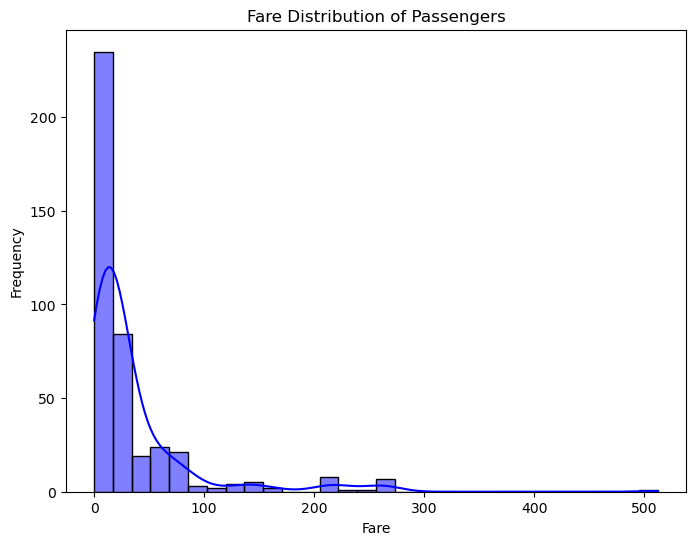

In [252]:
#age distribution by passengers
plt.figure(figsize=(8,6))
sns.histplot(test['Fare'].dropna(), kde=True, bins=30, color='blue')
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
#data is skewed

In [253]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [254]:
test['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

Handling misisng "Age" values

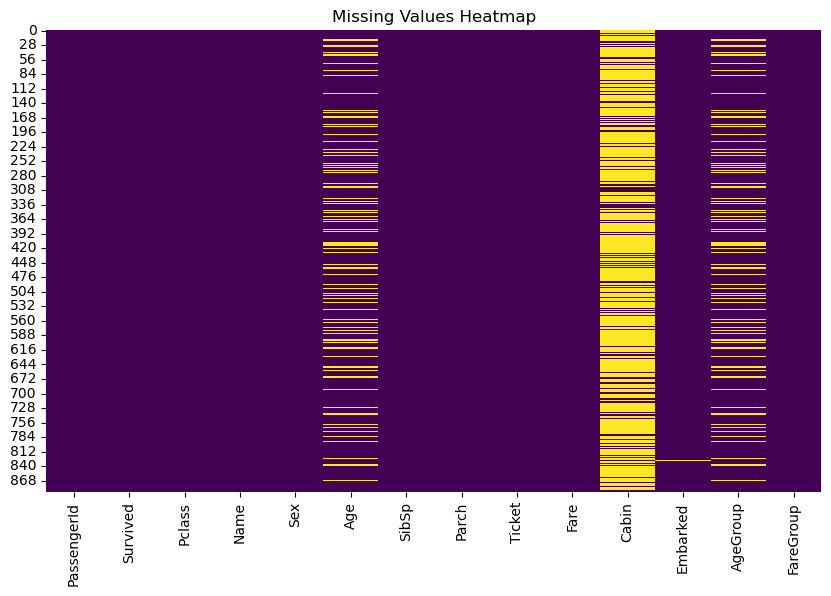

In [255]:
#Missing values heatmap-Train set
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

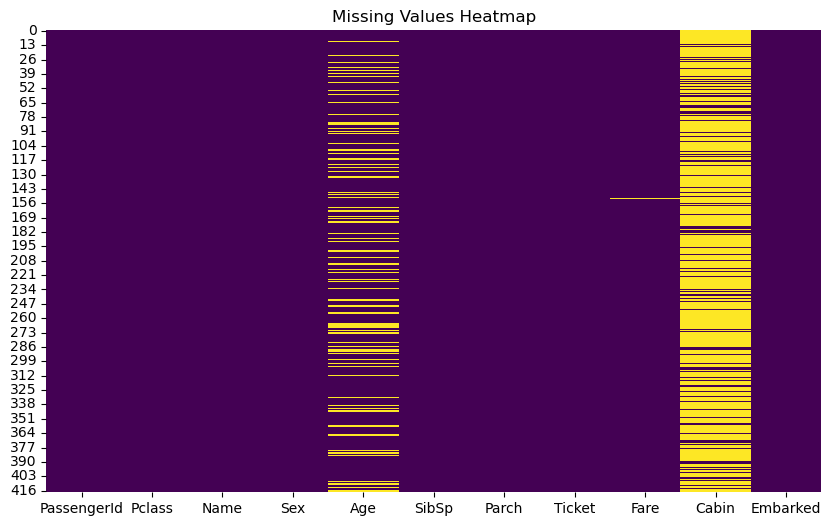

In [256]:
#Missing values heatmap-Test set
plt.figure(figsize=(10,6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

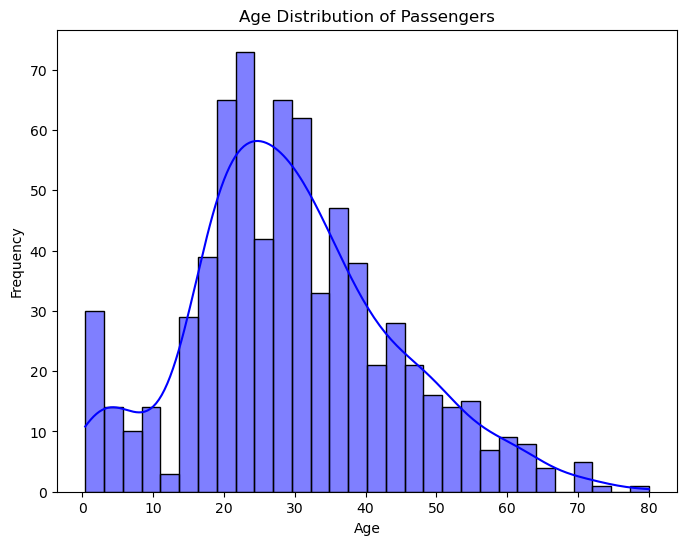

In [257]:
#age distribution of passengers
plt.figure(figsize=(8,6))
sns.histplot(train['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [258]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [259]:
train['Age'].mode()

0    24.0
Name: Age, dtype: float64

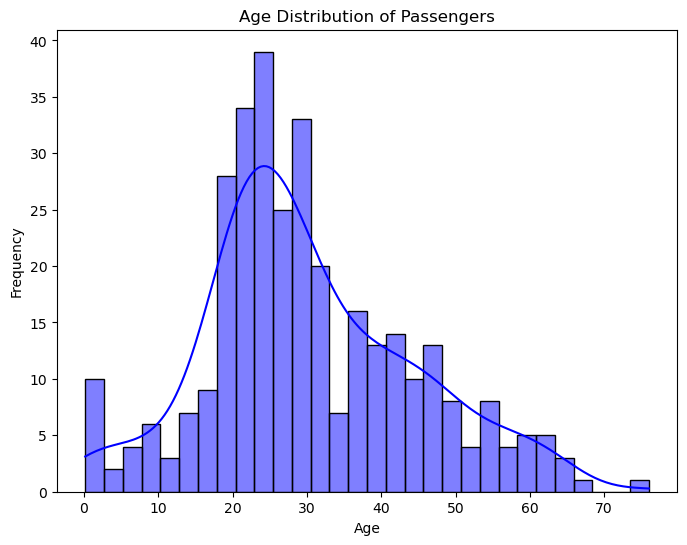

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [260]:
#Age distribution of passengers
plt.figure(figsize=(8,6))
sns.histplot(test['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

test['Age'].describe()

In [261]:
test['Age'].mode()

0    21.0
1    24.0
Name: Age, dtype: float64

Looks like the age data is skewed, and replacing the missing age values with mode would be useful.

Handling misisng "Embarked" values

In [262]:
# Display rows where the 'Embarked' column is missing
missing_embarked = train[train['Embarked'].isnull()]
missing_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,30-40,50-100
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,60-70,50-100


Looks like it seems reasonable to remove these rows as there aren't many.

Handling misisng "Cabin" values

In [263]:
missing_cabin_percentage = (train['Cabin'].isnull().sum() / len(train)) * 100
missing_cabin_percentage

77.10437710437711

In [264]:
# Display distinct values in the 'Cabin' column
distinct_cabins = train['Cabin'].unique()
print(distinct_cabins)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


The percentage of missing values for the Cabin column is considerably high. Given that more than 75% of the cabin details are missing, it is better to exclude the Cabin column from further analysis, even though it could be an important indicator for predicting survival.

### Clean the data

In [265]:
def clean1(df):
    # Calculate the mode value for 'Age'
    age_mode = df['Age'].mode()[0]  # mode() returns a Series, get the first element
    # Replace NaN values in 'Age' with the mode value
    df['Age'].fillna(age_mode, inplace=True)
    
    # Calculate the mode value for 'Fare'
    fare_mode = df['Fare'].mode()[0]  # mode() returns a Series, get the first element
    # Replace NaN values in 'Fare' with the mode value
    df['Fare'].fillna(fare_mode, inplace=True)
    
    # Remove rows where the 'Embarked' column has missing values
    df.dropna(subset=['Embarked'], inplace=True)

    # Remove the 'Cabin' column from the DataFrame
    df.drop(columns=['Cabin'], inplace = True)

    # Drop unwanted columns if they exist
    columns_to_drop = ["PassengerId", "Name", "Ticket", "AgeGroup", "FareGroup"]
    existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    
    if existing_columns_to_drop:
        df.drop(columns=existing_columns_to_drop, inplace=True)

clean1(train)
clean1(test)

re-checking missing values

In [266]:
# Get the number of missing values for each column
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [267]:
# Get the number of missing values for each column
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Data encoder

In [268]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [269]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [270]:
from sklearn import preprocessing

# Initialize the label encoder
le = preprocessing.LabelEncoder()

# Columns to be transformed
cols = ["Sex", "Embarked"]

# Dictionary to store the mapping of original categories to their encoded values
label_mapping = {}

# Apply label encoding to the specified columns in both train and test datasets
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    
    # Store the mapping of the original categories to their encoded values
    label_mapping[col] = {class_label: index for index, class_label in enumerate(le.classes_)}

    # Display the transformation
for col, mapping in label_mapping.items():
    print(f"'{col}' transformation:")
    for key, value in mapping.items():
        print(f"  {key} -> {value}")

'Sex' transformation:
  female -> 0
  male -> 1
'Embarked' transformation:
  C -> 0
  Q -> 1
  S -> 2


In [271]:
# Display the transformed columns    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Data scaling

## Version 1

### Logistic Regression

#### Model development

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Define target and features
y = train["Survived"]
X = train.drop("Survived", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to NumPy arrays (if not already done)
X_train_scaled = X_train_scaled.astype(float)
X_val_scaled = X_val_scaled.astype(float)

LogitReg_V1 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
LogitReg_V1

LogisticRegression(max_iter=1000, random_state=0)

#### Model evaluation

Coefficients with corresponding features:
Pclass: -1.1055855360193065
Sex: -2.6377568251972994
Age: -0.041052829971901364
SibSp: -0.368613158592921
Parch: -0.04710212788108782
Fare: 0.001768334571515924
Embarked: -0.2543348891476707
Coefficients: [[-1.10558554e+00 -2.63775683e+00 -4.10528300e-02 -3.68613159e-01
  -4.71021279e-02  1.76833457e-03 -2.54334889e-01]]
Intercept: [5.39269352]
Accuracy: 0.7753
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



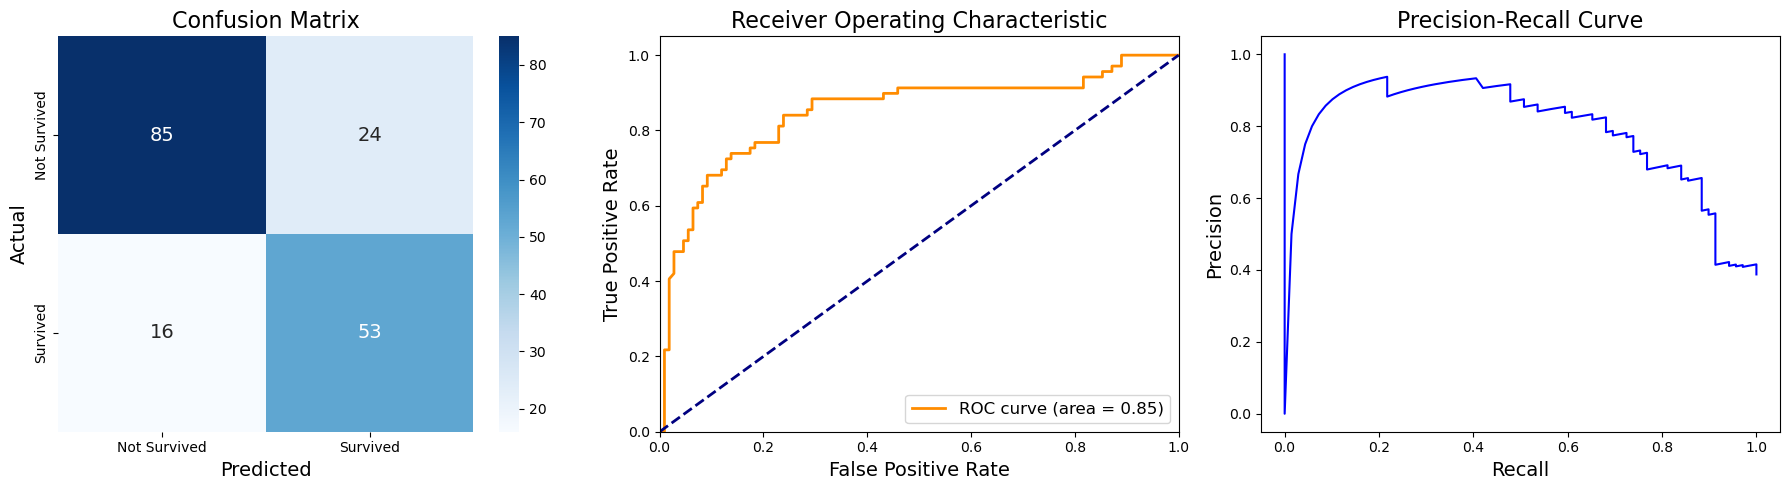

In [273]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

def evaluate_logistic_model(model, X_val, y_val):
    """
    Evaluates the performance of a logistic regression model on a validation set.

    Parameters:
    - model: Trained logistic regression model
    - X_val: Validation features
    - y_val: True labels for the validation set

    Outputs:
    - Prints coefficients, accuracy, classification report
    - Plots Confusion Matrix, ROC curve, and Precision-Recall curve
    """
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Assuming features are in this order in X_val
    feature_names = X_val.columns
    
    # Get the coefficients from the trained model
    coefficients = model.coef_[0]
    
    # Print the coefficients with their corresponding feature names
    print("Coefficients with corresponding features:")
    for feature, coef in zip(feature_names, coefficients):
        print(f"{feature}: {coef}")
    
    # Coefficients and intercept
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # Generate classification report
    class_report = classification_report(y_val, y_pred)
    print('Classification Report:')
    print(class_report)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    roc_auc = auc(fpr, tpr)
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val, model.predict_proba(X_val)[:,1])
    
    # Create subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Survived', 'Survived'], 
                yticklabels=['Not Survived', 'Survived'], ax=ax[0],
                annot_kws={"size": 14})  # Increase annotation font size
    ax[0].set_xlabel('Predicted', fontsize=14)
    ax[0].set_ylabel('Actual', fontsize=14)
    ax[0].set_title('Confusion Matrix', fontsize=16)
    
    # Plot ROC Curve
    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate', fontsize=14)
    ax[1].set_ylabel('True Positive Rate', fontsize=14)
    ax[1].set_title('Receiver Operating Characteristic', fontsize=16)
    ax[1].legend(loc='lower right', fontsize=12)
    
    # Plot Precision-Recall Curve
    ax[2].plot(recall, precision, color='b')
    ax[2].set_xlabel('Recall', fontsize=14)
    ax[2].set_ylabel('Precision', fontsize=14)
    ax[2].set_title('Precision-Recall Curve', fontsize=16)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
model = LogitReg_V1
evaluate_logistic_model(model, X_val, y_val)

**Accuracy** is 0.7753. This means that the model correctly predicted the survival status (either Survived or Not Survived) of 77.53% of the passengers in the validation set.

The classification report provides a detailed breakdown of the model's performance for each class (in this case, Survived = 1 and Not Survived = 0). It includes precision, recall, and F1-score metrics.

1. **Precision**:

For class 0 (Not Survived): 0.84 of all the passengers predicted to have not survived, 84% actually did not survive.
For class 1 (Survived): 0.69 of all the passengers predicted to have survived, 69% actually survived.

2. **Recall**:

For class 0 (Not Survived): 0.78 of all the passengers who actually did not survive, the model correctly identified 78% of them.
For class 1 (Survived): 0.77 of all the passengers who actually survived, the model correctly identified 75% of them.

3. **F1-Score**:

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
For class 0 (Not Survived): 0.81
For class 1 (Survived): 0.73

4. **Support**: This indicates the number of true instances of each class in the validation set:

Not Survived: 109
Survived: 69

Macro Avg and Weighted Avg:

5. **Macro Avg**: The unweighted average of precision, recall, and F1-score across all classes.
6. **Weighted Avg**: The average of precision, recall, and F1-score across all classes, weighted by the number of instances in each class.
These averages give an overall sense of model performance, considering class imbalance.

**Summary**
- The model has an accuracy of 77.53%, meaning it correctly predicts the survival status of about 78% of the passengers.
- The model is more precise in predicting passengers who did not survive (precision = 0.84) than those who did survive (precision = 0.69).
- The recall is relatively balanced across classes, with a slight advantage in predicting survival.
- The F1-scores indicate that the model is fairly good at balancing precision and recall, especially for predicting passengers who did not survive.

- **Residuals vs. Fitted Values**: To check for patterns in residuals.
- **Q-Q Plot**: To check if residuals follow a normal distribution.
- **ROC Curve**: To visualise the model's performance across different thresholds.
- **Precision-Recall Curve**: To evaluate precision and recall trade-offs.
- **Leverage and Influence Plots**: To identify influential data points.
- **Histogram of Residuals**: To assess the distribution of residuals.

These plots help you diagnose model fit, identify influential points, and evaluate the assumptions of your logistic regression model.

#### Results for submission

Creating and saving submission file.

In [274]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": LogitReg_V1.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_LogitReg_V1.csv", index = False)

In [275]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,21.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,21.0,0,0,8.0500,2


In [276]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


#### Statmodels model and results

In [277]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.439344
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  711
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            7
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                  0.3390
Time:                        09:02:23   Log-Likelihood:                -312.37
converged:                       True   LL-Null:                       -472.55
Covariance Type:            nonrobust   LLR p-value:                 2.713e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6607      0.652      8.678      0.000       4.382       6.939
Pclass        -1.1559      0.

Residuals vs. Fitted Values
This plot helps assess the fit of the model. You look for any patterns that might indicate issues with the model assumptions.

A Q-Q plot helps assess if residuals follow a normal distribution, which is an assumption in logistic regression.

The ROC curve visualizes the trade-off between the true positive rate and false positive rate across different thresholds.

The Precision-Recall curve helps evaluate the trade-offs between precision and recall for different thresholds.

Leverage and Influence Plots
These plots help identify influential data points that have a significant impact on the regression results.

Histogram of Residuals
This plot helps check if residuals are normally distributed, which can be a sign of model fit issues.

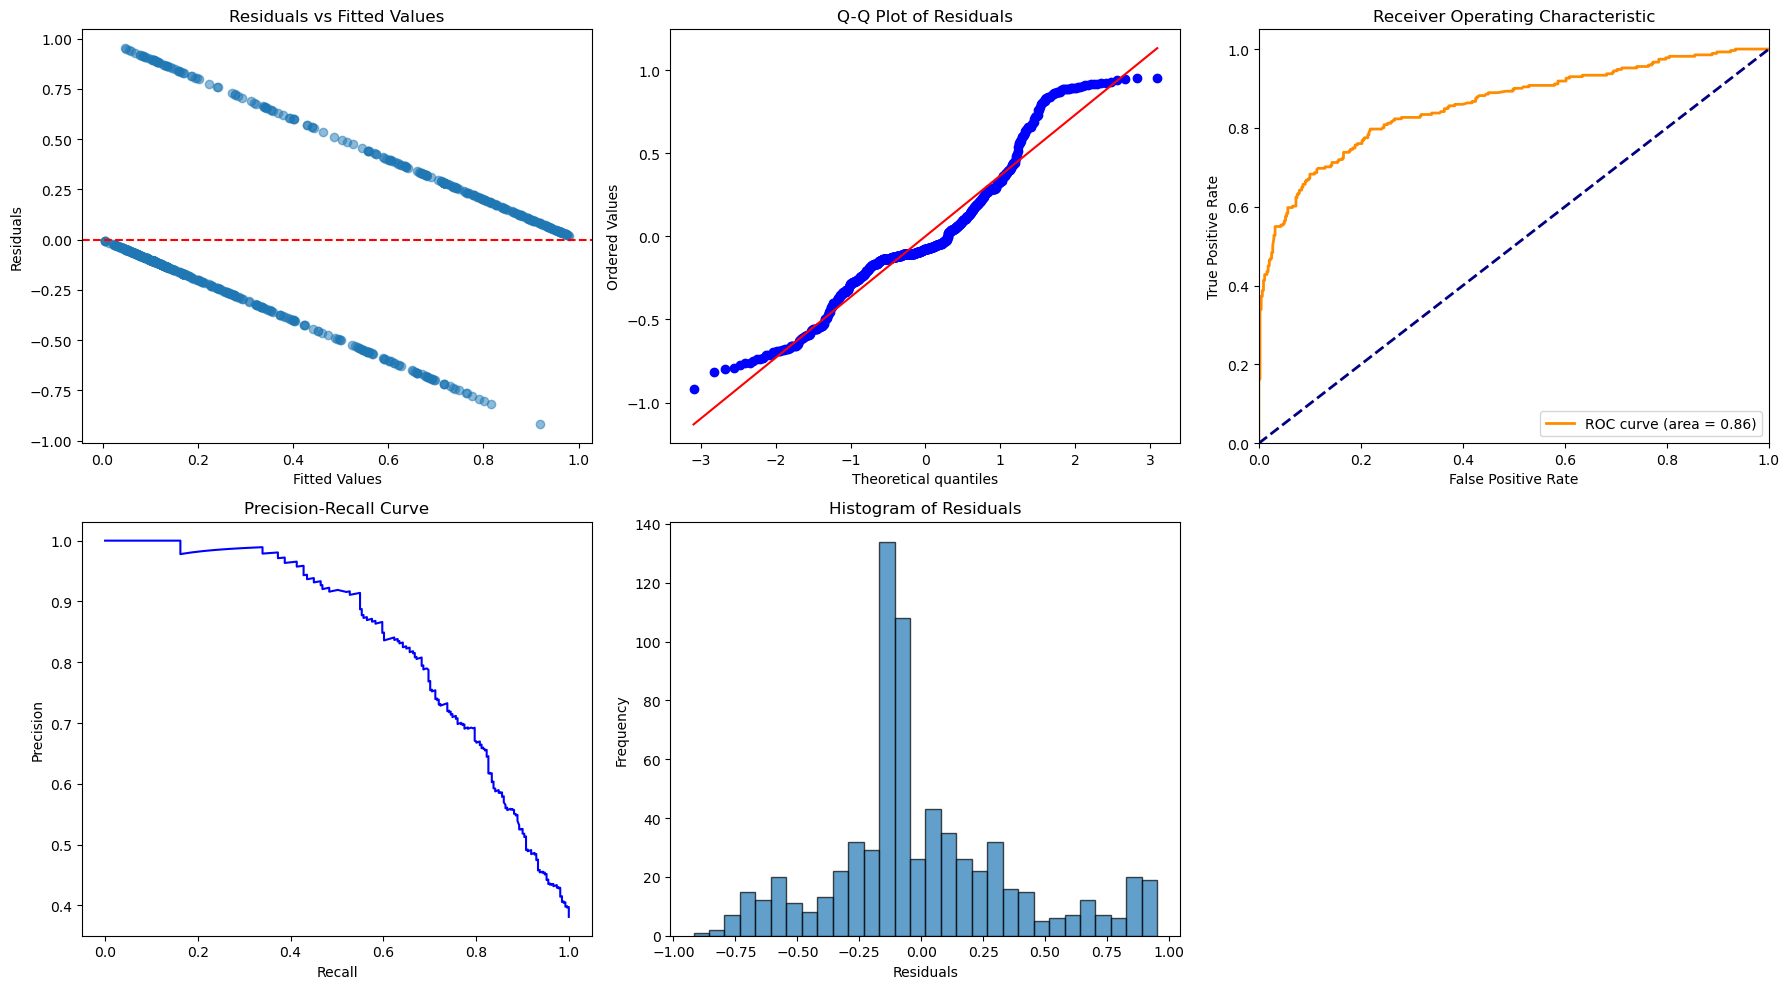

In [278]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Predict on training data
y_pred = result.predict(X_train_sm)

# Calculate residuals
residuals = y_train - y_pred

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Residuals vs Fitted Values plot
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Q-Q Plot of Residuals
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Residuals')

# ROC Curve
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
axes[0, 2].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0, 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 2].set_xlim([0.0, 1.0])
axes[0, 2].set_ylim([0.0, 1.05])
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('Receiver Operating Characteristic')
axes[0, 2].legend(loc='lower right')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_train, y_pred)
axes[1, 0].plot(recall, precision, color='b')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')

# Histogram of Residuals
axes[1, 1].hist(residuals, bins=30, edgecolor='k', alpha=0.7)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals')

# Remove the last unused subplot (bottom right)
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### XGradientBoost

#### Model development

In [279]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_V1 = XGBClassifier(random_state=0, eval_metric='logloss')
xgb_V1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

#### Model evaluation

Accuracy: 0.8034
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



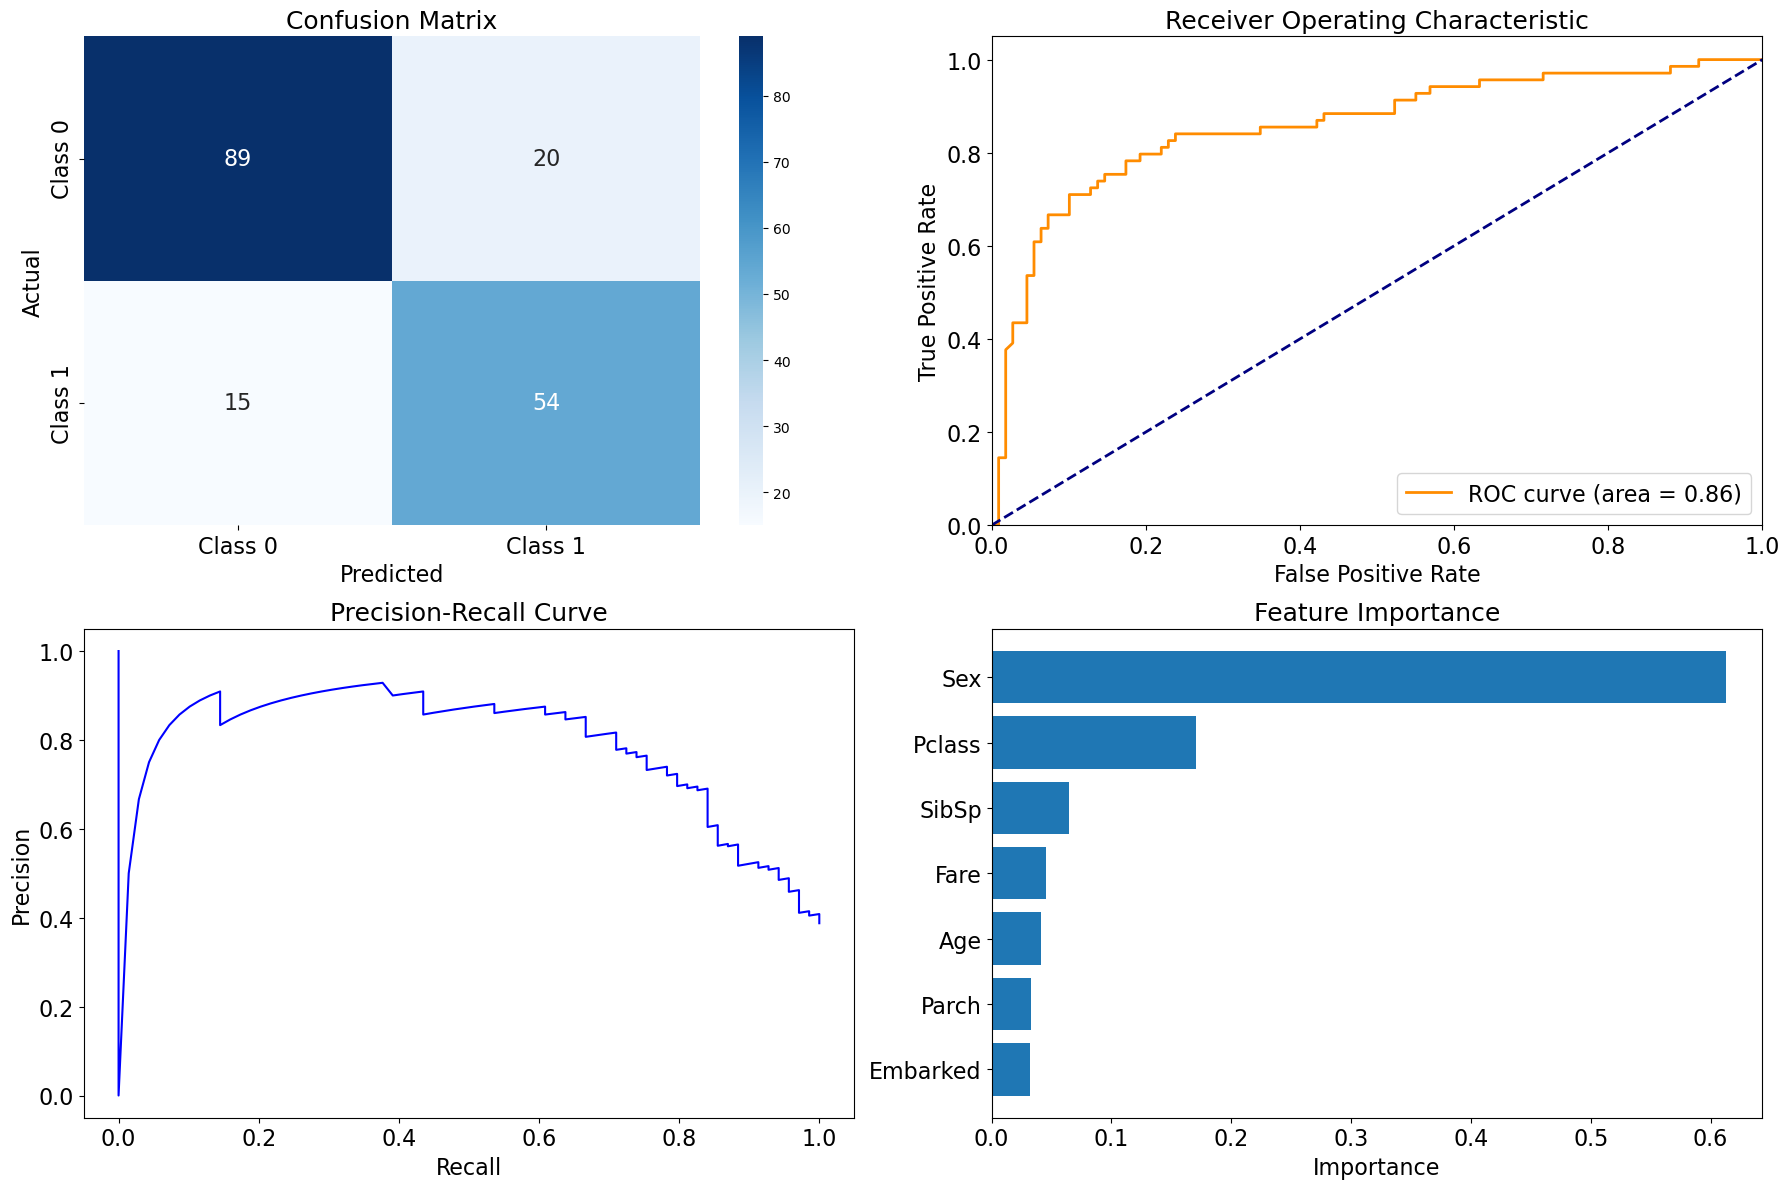

In [281]:
from xgboost import plot_importance
from sklearn.inspection import PartialDependenceDisplay

def evaluate_model_performance_GB(model, X_val, y_val):
    """
    Evaluates the performance of a trained model on a validation set.

    Parameters:
    - model: Trained model (e.g., Logistic Regression, SVC, RandomForestClassifier, XGBClassifier)
    - X_val: Validation features
    - y_val: True labels for the validation set
    - title_size: Font size for plot titles
    - label_size: Font size for axis labels
    - tick_size: Font size for tick labels
    - legend_size: Font size for legend
    
    Outputs:
    - Prints accuracy and classification report
    - Plots Confusion Matrix, ROC curve, Precision-Recall curve, and Feature Importance (if applicable)
    """
    title_size=18 
    label_size=16
    tick_size=16 
    legend_size=16
    annot_size=16
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC and Precision-Recall curves

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # Generate classification report
    class_report = classification_report(y_val, y_pred)
    print('Classification Report:')
    print(class_report)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val, y_prob)
    
    # Create subplots
    fig, ax = plt.subplots(2, 2, figsize=(18, 12))
    
    # Plot Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'], ax=ax[0, 0], annot_kws={"size": annot_size})
    ax[0, 0].set_xlabel('Predicted', fontsize=label_size)
    ax[0, 0].set_ylabel('Actual', fontsize=label_size)
    ax[0, 0].set_title('Confusion Matrix', fontsize=title_size)
    ax[0, 0].tick_params(axis='both', which='major', labelsize=tick_size)
    
    # Plot ROC Curve
    ax[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0, 1].set_xlim([0.0, 1.0])
    ax[0, 1].set_ylim([0.0, 1.05])
    ax[0, 1].set_xlabel('False Positive Rate', fontsize=label_size)
    ax[0, 1].set_ylabel('True Positive Rate', fontsize=label_size)
    ax[0, 1].set_title('Receiver Operating Characteristic', fontsize=title_size)
    ax[0, 1].legend(loc='lower right', fontsize=legend_size)
    ax[0, 1].tick_params(axis='both', which='major', labelsize=tick_size)
    
    # Plot Precision-Recall Curve
    ax[1, 0].plot(recall, precision, color='b')
    ax[1, 0].set_xlabel('Recall', fontsize=label_size)
    ax[1, 0].set_ylabel('Precision', fontsize=label_size)
    ax[1, 0].set_title('Precision-Recall Curve', fontsize=title_size)
    ax[1, 0].tick_params(axis='both', which='major', labelsize=tick_size)
    
    # Plot Feature Importance (for XGBoost models)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)
        features = X_val.columns
        
        ax[1, 1].barh(range(len(indices)), importances[indices], align='center')
        ax[1, 1].set_yticks(range(len(indices)))
        ax[1, 1].set_yticklabels(features[indices], fontsize=tick_size)
        ax[1, 1].set_xlabel('Importance', fontsize=label_size)
        ax[1, 1].set_title('Feature Importance', fontsize=title_size)
        ax[1, 1].tick_params(axis='both', which='major', labelsize=tick_size)
    else:
        ax[1, 1].text(0.5, 0.5, 'No Feature Importance Plot', horizontalalignment='center', verticalalignment='center', fontsize=label_size, color='gray')
        ax[1, 1].set_title('Placeholder', fontsize=title_size)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
 
model = xgb_V1
evaluate_model_performance_GB(model, X_val, y_val)

#### Results for submission

In [282]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": xgb_V1.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_xgb_V1.csv", index = False)

### Support Vector Classifier (SVC)

#### Model Development

In [67]:
from sklearn.svm import SVC

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to NumPy arrays (if not already done)
X_train_scaled = X_train_scaled.astype(float)
X_val_scaled = X_val_scaled.astype(float)

# Initialize the Support Vector Classifier
svc_V1 = SVC(kernel='linear', random_state=42)

# Fit the model on the scaled training data
svc_V1.fit(X_train, y_train)

# Predict on the validation data
y_pred = svc_V1.predict(X_val)

#### Model evaluation

In [68]:
# Fit the model on the scaled training data
svc_V1.fit(X_train_scaled, y_train)

# Predict on the validation data
y_pred = svc_V1.predict(X_val_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[89 20]
 [16 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



#### Results for submission

In [317]:
# Scale the new data using the same scaler
test_scaled = scaler.transform(test)

df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": svc_V1.predict(test_scaled)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_svc_V1.csv", index = False)

### Random Forest 

In [321]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
randomforest_V1 = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest_V1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [322]:
from xgboost import plot_importance
from sklearn.inspection import PartialDependenceDisplay

def evaluate_model_performance_RF(model, X_val, y_val, X_train):
    """
    Evaluates the performance of a trained model on a validation set.

    Parameters:
    - model: Trained model (e.g., Logistic Regression, SVC, RandomForestClassifier, XGBClassifier)
    - X_val: Validation features
    - y_val: True labels for the validation set
    - title_size: Font size for plot titles
    - label_size: Font size for axis labels
    - tick_size: Font size for tick labels
    - legend_size: Font size for legend
    - X_train: Training features
    
    Outputs:
    - Prints accuracy and classification report
    - Plots Confusion Matrix, ROC curve, Precision-Recall curve, and Feature Importance (if applicable)
    """
    title_size=18 
    label_size=16
    tick_size=16 
    legend_size=16
    annot_size=16
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC and Precision-Recall curves

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # Generate classification report
    class_report = classification_report(y_val, y_pred)
    print('Classification Report:')
    print(class_report)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val, y_prob)
    
    # Create subplots
    fig, ax = plt.subplots(2, 2, figsize=(18, 12))
    
    # Plot Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'], ax=ax[0, 0], annot_kws={"size": annot_size})
    ax[0, 0].set_xlabel('Predicted', fontsize=label_size)
    ax[0, 0].set_ylabel('Actual', fontsize=label_size)
    ax[0, 0].set_title('Confusion Matrix', fontsize=title_size)
    ax[0, 0].tick_params(axis='both', which='major', labelsize=tick_size)
    
    # Plot ROC Curve
    ax[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0, 1].set_xlim([0.0, 1.0])
    ax[0, 1].set_ylim([0.0, 1.05])
    ax[0, 1].set_xlabel('False Positive Rate', fontsize=label_size)
    ax[0, 1].set_ylabel('True Positive Rate', fontsize=label_size)
    ax[0, 1].set_title('Receiver Operating Characteristic', fontsize=title_size)
    ax[0, 1].legend(loc='lower right', fontsize=legend_size)
    ax[0, 1].tick_params(axis='both', which='major', labelsize=tick_size)
    
    # Plot Precision-Recall Curve
    ax[1, 0].plot(recall, precision, color='b')
    ax[1, 0].set_xlabel('Recall', fontsize=label_size)
    ax[1, 0].set_ylabel('Precision', fontsize=label_size)
    ax[1, 0].set_title('Precision-Recall Curve', fontsize=title_size)
    ax[1, 0].tick_params(axis='both', which='major', labelsize=tick_size)
    
    # Plot Feature Importance (for XGBoost models)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)
        features = X_val.columns
        
        ax[1, 1].barh(range(len(indices)), importances[indices], align='center')
        ax[1, 1].set_yticks(range(len(indices)))
        ax[1, 1].set_yticklabels(features[indices], fontsize=tick_size)
        ax[1, 1].set_xlabel('Importance', fontsize=label_size)
        ax[1, 1].set_title('Feature Importance', fontsize=title_size)
        ax[1, 1].tick_params(axis='both', which='major', labelsize=tick_size)
    else:
        ax[1, 1].text(0.5, 0.5, 'No Feature Importance Plot', horizontalalignment='center', verticalalignment='center', fontsize=label_size, color='gray')
        ax[1, 1].set_title('Placeholder', fontsize=title_size)
    
    # Adjust layout for previous plots (if any)
    plt.tight_layout()
    plt.show()
    
    # Identify all features from the training data
    features_of_interest = X_train.columns.tolist()
    
    # Define number of columns and calculate the number of rows needed
    num_cols = 3
    num_rows = (len(features_of_interest) + num_cols - 1) // num_cols  # Round up the number of rows
    
    # Generate partial dependence plots
    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))
    
    # Flatten ax if it's a multi-dimensional array, otherwise keep it as a list
    ax = ax.flatten()
    
    display = PartialDependenceDisplay.from_estimator(model, X_train, features_of_interest, ax=ax[:len(features_of_interest)], grid_resolution=50)
    
    # Add x-axis labels manually
    for i, feature_name in enumerate(features_of_interest):
        ax[i].set_xlabel(feature_name)
        ax[i].set_ylabel('Partial Dependence')
    
    # Remove any empty subplots if the number of features is not a multiple of num_cols
    for j in range(len(features_of_interest), len(ax)):
        fig.delaxes(ax[j])
    
    # Display the plot
    plt.tight_layout()
    plt.show()



Accuracy: 0.7978
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



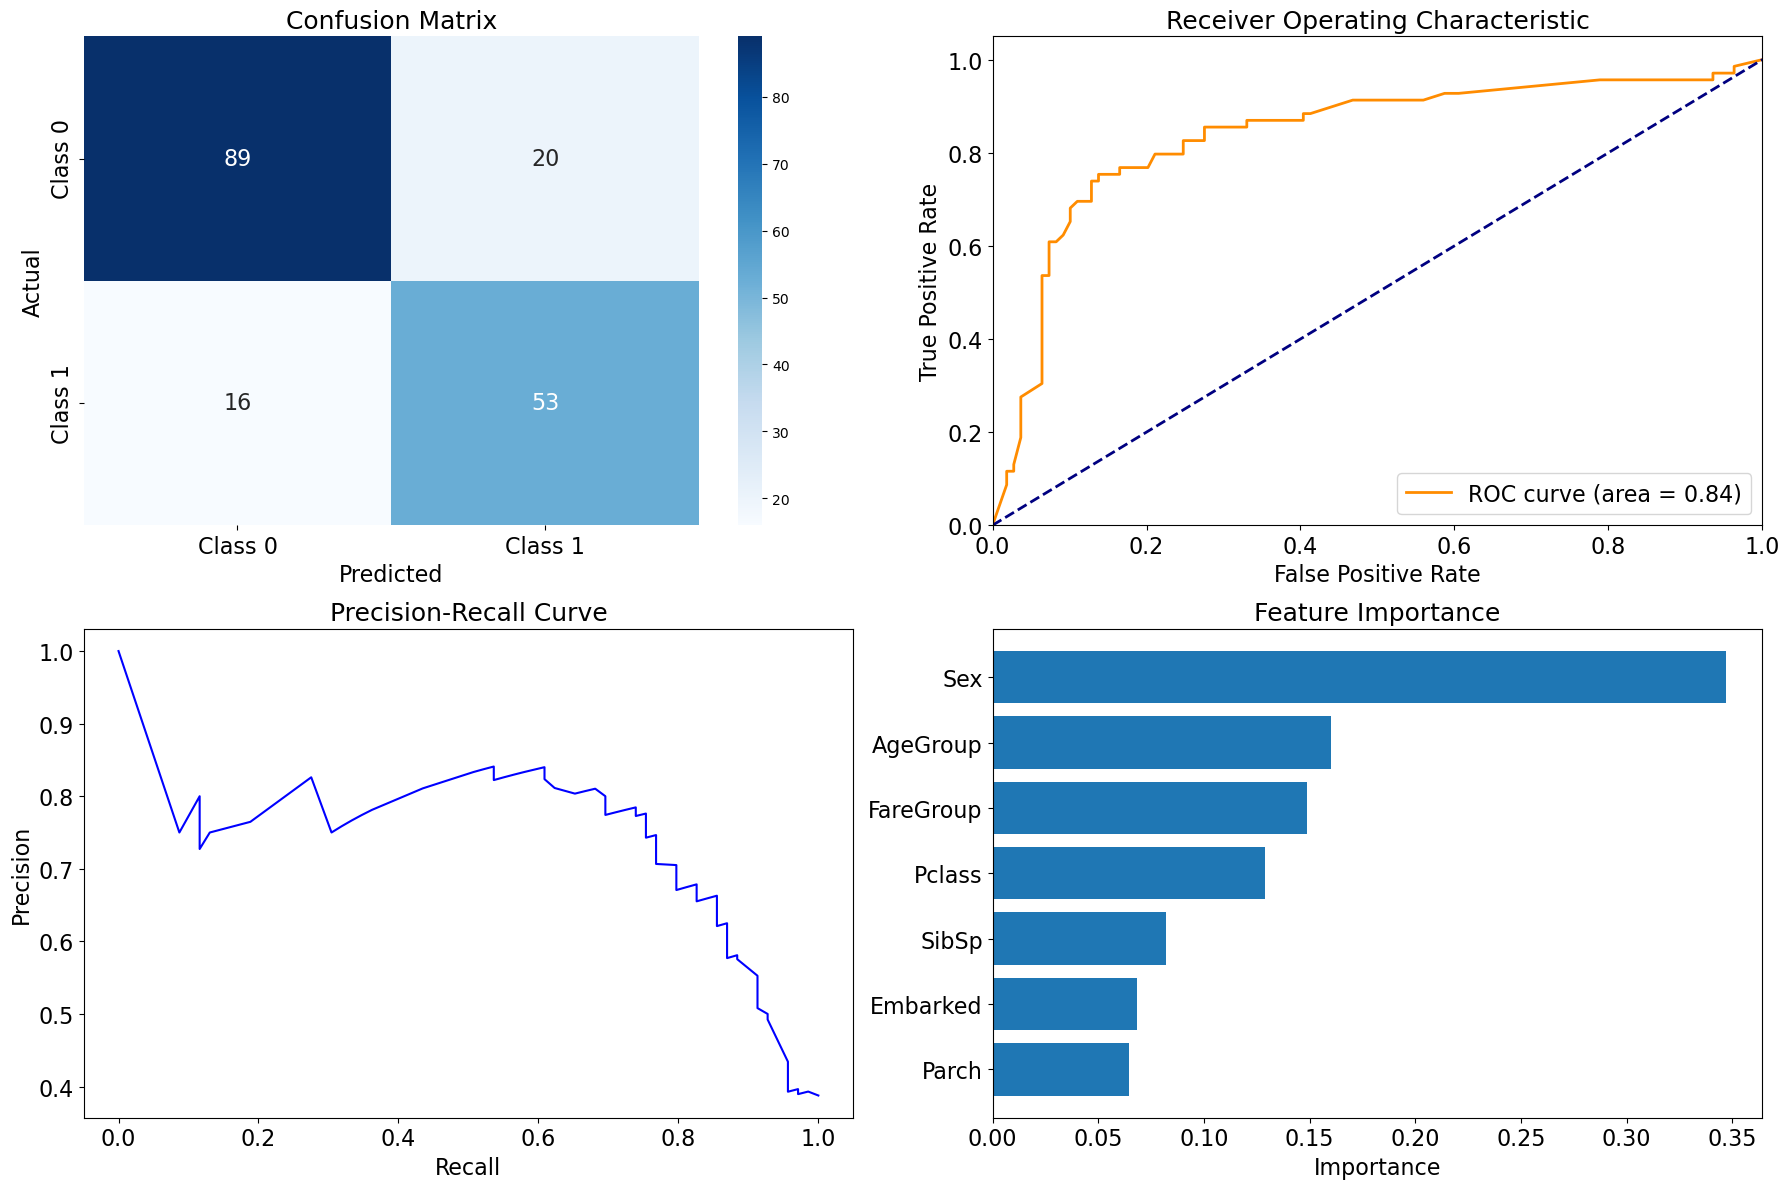

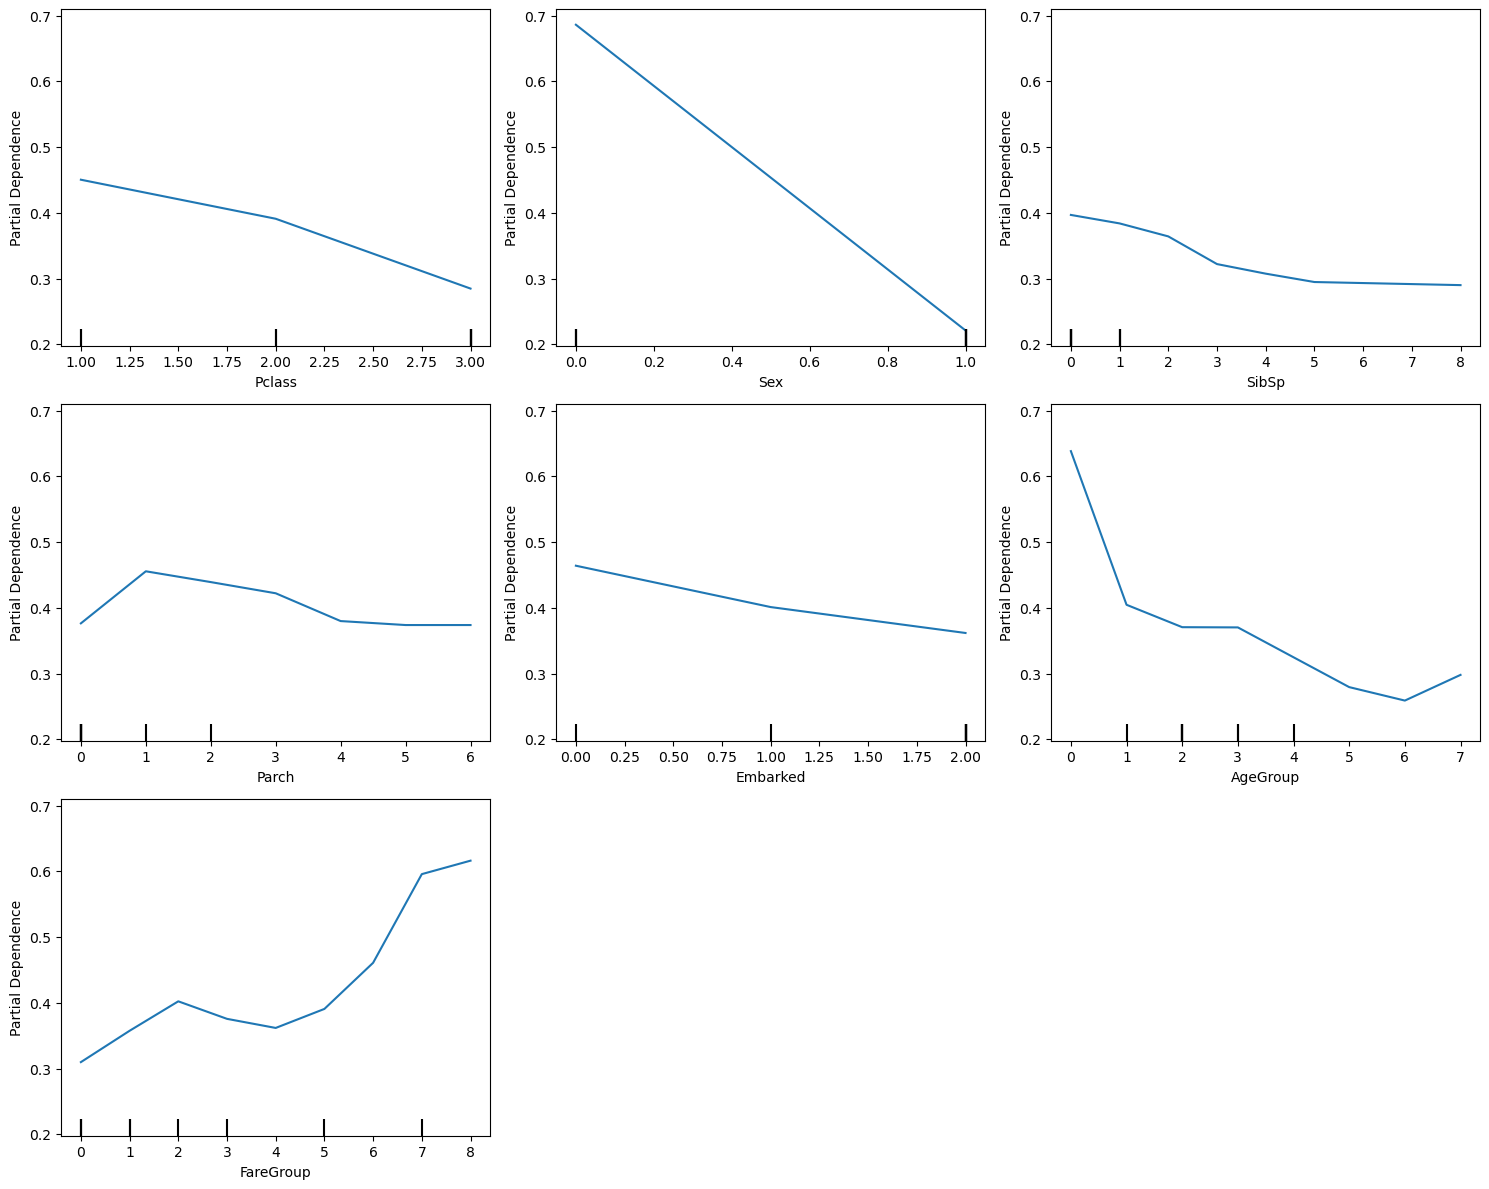

In [323]:
model = randomforest_V1
evaluate_model_performance_RF(model, X_val, y_val, X_train)

In [324]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": randomforest_V1.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_randomforest_V1.csv", index = False)

## Version 2: Feature engineering

### Data processing

In [325]:
# load data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
test_ids = test["PassengerId"]

In [326]:
def clean2(df):
    
    # Calculate the mode value for 'Age'
    age_mode = df['Age'].mode()[0]  # mode() returns a Series, get the first element
    # Replace NaN values in 'Age' with the mode value
    df['Age'].fillna(age_mode, inplace=True)

    # Bin the age data into ranges (e.g., 0-10, 10-20, etc.)
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

    # Calculate the mode value for 'Fare'
    fare_mode = df['Fare'].mode()[0]  # mode() returns a Series, get the first element
    # Replace NaN values in 'Fare' with the mode value
    df['Fare'].fillna(fare_mode, inplace=True)

    # Bin the fare data into ranges (e.g., 0-10, 10-20, etc.)
    # Zero fare is included in the first bin
    fare_bins = [-0.01, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600]
    fare_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600']
    df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=True)
    
    # Remove rows where the 'Embarked' column has missing values
    df.dropna(subset=['Embarked'], inplace=True)
    
    # Remove the 'Cabin' column from the DataFrame
    df.drop(columns=['Cabin'], inplace = True)

    # Drop unwanted columns if they exist
    columns_to_drop = ["PassengerId", "Name", "Ticket", "Age", "Fare"]
    existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    
    if existing_columns_to_drop:
        df.drop(columns=existing_columns_to_drop, inplace=True)

clean2(train)
clean2(test)

In [327]:
from sklearn import preprocessing

# Initialize the label encoder
le = preprocessing.LabelEncoder()

# Columns to be transformed
cols = ["Sex", "Embarked", "AgeGroup", "FareGroup"]

# Dictionary to store the mapping of original categories to their encoded values
label_mapping = {}

# Apply label encoding to the specified columns in both train and test datasets
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    
    # Store the mapping of the original categories to their encoded values
    label_mapping[col] = {class_label: index for index, class_label in enumerate(le.classes_)}

    # Display the transformation
for col, mapping in label_mapping.items():
    print(f"'{col}' transformation:")
    for key, value in mapping.items():
        print(f"  {key} -> {value}")

'Sex' transformation:
  female -> 0
  male -> 1
'Embarked' transformation:
  C -> 0
  Q -> 1
  S -> 2
'AgeGroup' transformation:
  0-10 -> 0
  10-20 -> 1
  20-30 -> 2
  30-40 -> 3
  40-50 -> 4
  50-60 -> 5
  60-70 -> 6
  70-80 -> 7
'FareGroup' transformation:
  0-10 -> 0
  10-20 -> 1
  100-200 -> 2
  20-30 -> 3
  200-300 -> 4
  30-40 -> 5
  40-50 -> 6
  50-100 -> 7
  500-600 -> 8


### Logistic regression

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler

# Define target and features
y = train["Survived"]
X = train.drop("Survived", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

LogitReg_V2 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

Coefficients with corresponding features:
Pclass: -0.911911299293723
Sex: -2.65177858773723
SibSp: -0.4653166654536117
Parch: -0.08850563842619477
Embarked: -0.2561604032237217
AgeGroup: -0.40463864126942445
FareGroup: 0.12874727191295426
Coefficients: [[-0.9119113  -2.65177859 -0.46531667 -0.08850564 -0.2561604  -0.40463864
   0.12874727]]
Intercept: [4.5802822]
Accuracy: 0.7697
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



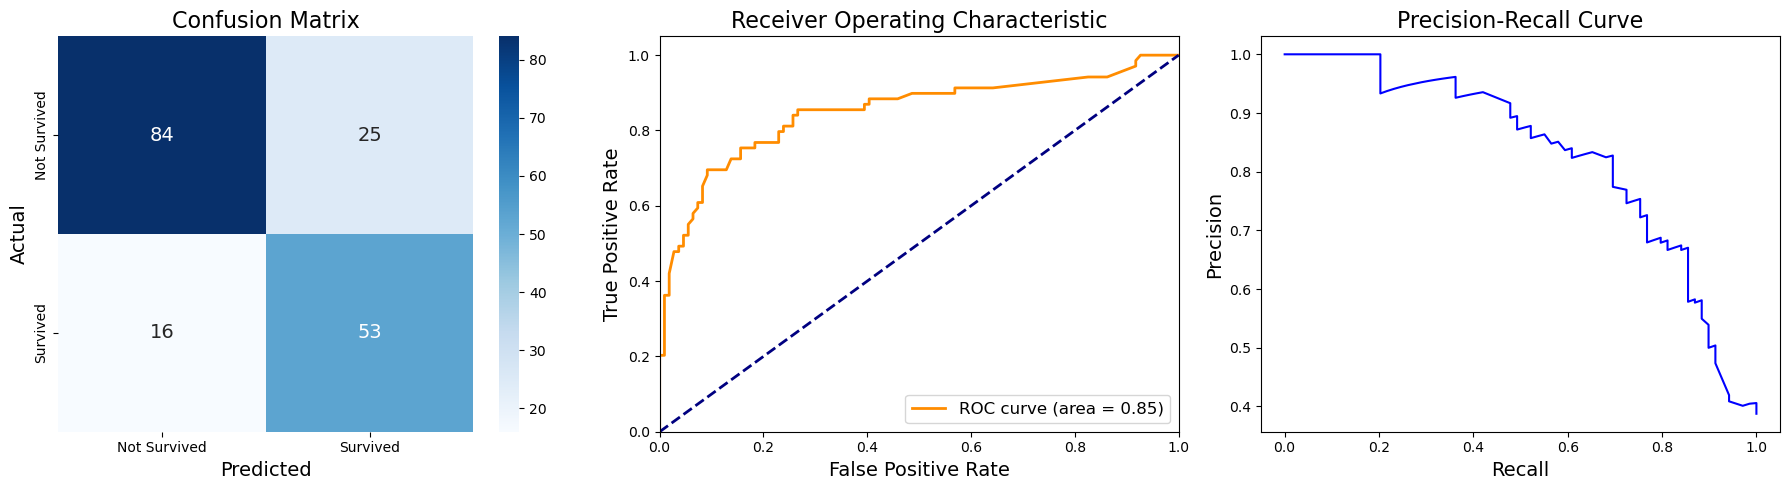

In [295]:
model = LogitReg_V2
evaluate_logistic_model(model, X_val, y_val)

In [296]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": LogitReg_V2.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_LogitReg_V2.csv", index = False)

### XGradientBoost

Accuracy: 0.7809
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.70      0.75      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



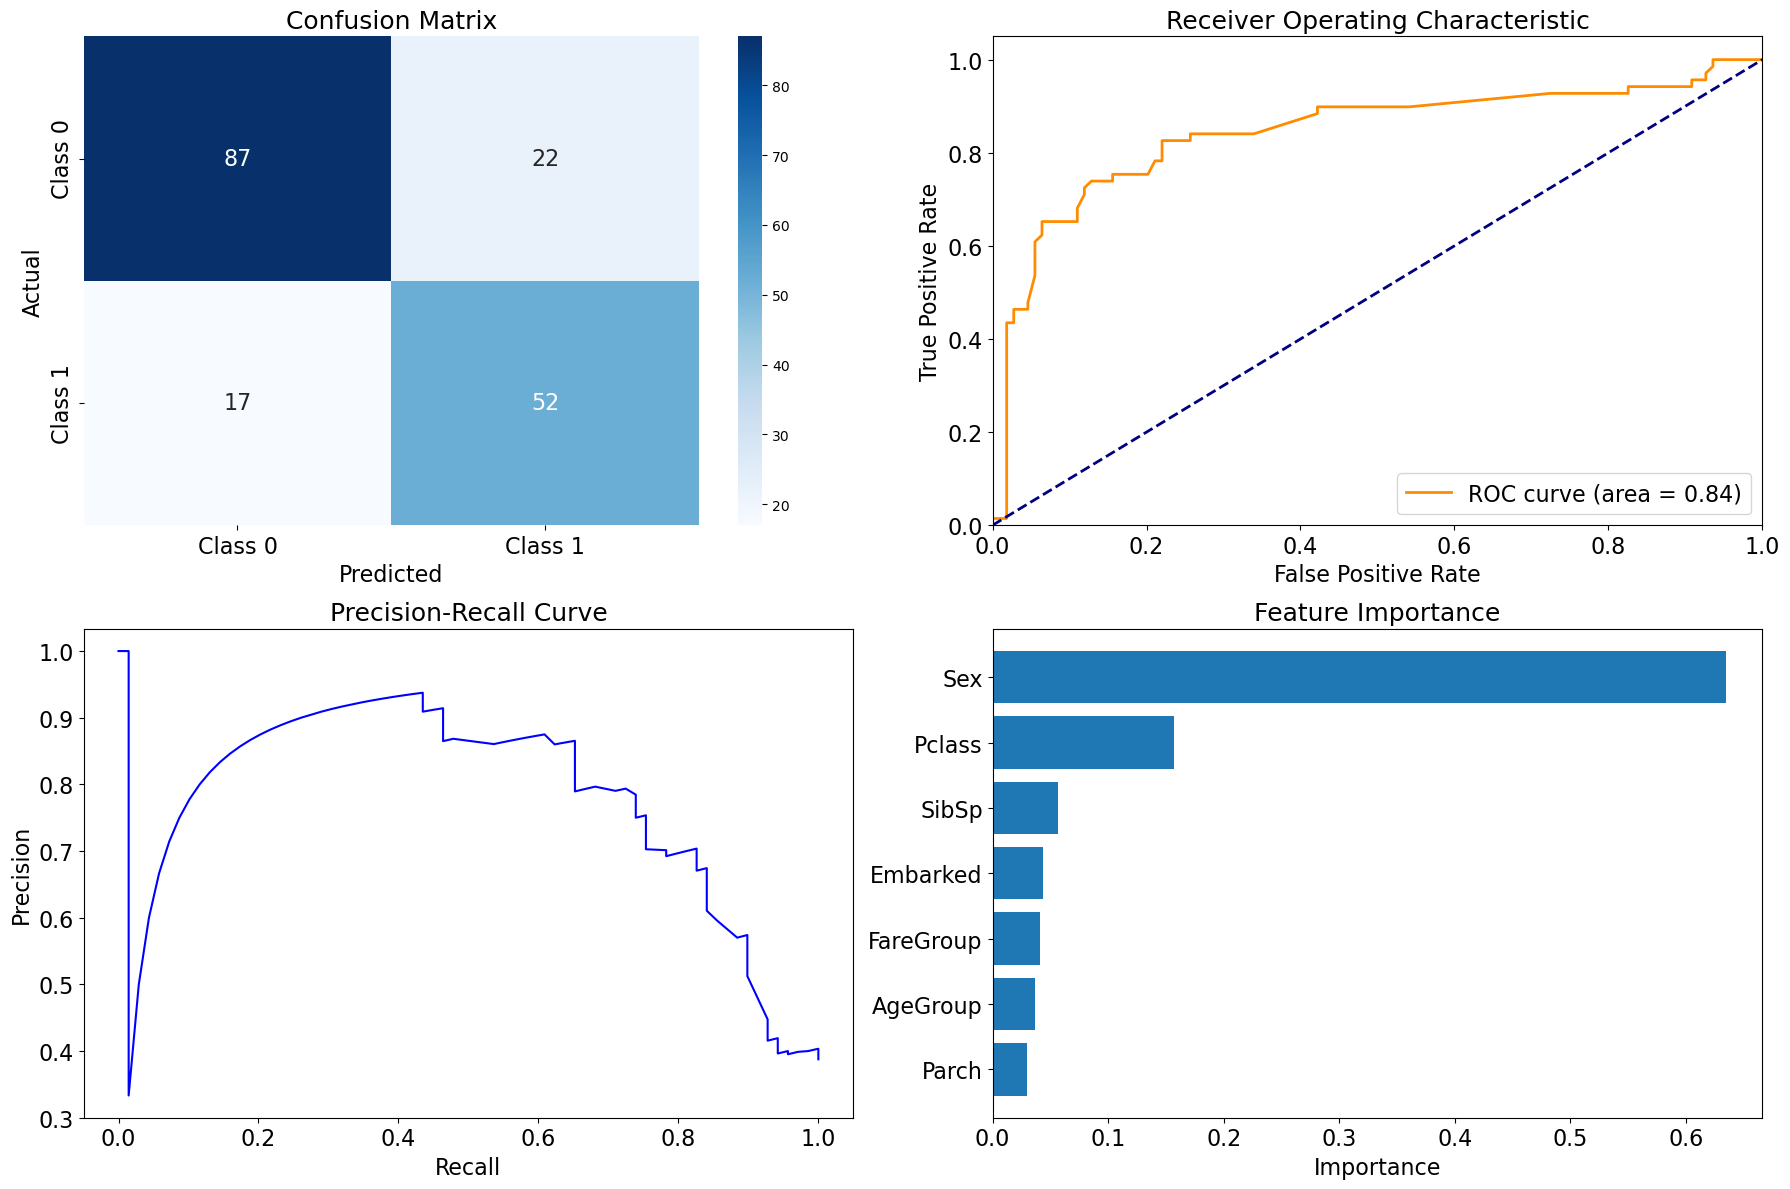

In [297]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_V2 = XGBClassifier(random_state=0, eval_metric='logloss')
xgb_V2.fit(X_train, y_train)

model = xgb_V2
evaluate_model_performance_GB(model, X_val, y_val)

In [298]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": xgb_V2.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_xgb_V2.csv", index = False)

### Support Vector Classifier (SVC)

In [299]:
from sklearn.svm import SVC

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to NumPy arrays (if not already done)
X_train_scaled = X_train_scaled.astype(float)
X_val_scaled = X_val_scaled.astype(float)

# Initialize the Support Vector Classifier
svc_V2 = SVC(kernel='linear', random_state=42)

# Fit the model on the scaled training data
svc_V2.fit(X_train, y_train)

# Predict on the validation data
y_pred = svc_V2.predict(X_val)

In [300]:
# Fit the model on the scaled training data
svc_V2.fit(X_train_scaled, y_train)

# Predict on the validation data
y_pred = svc_V2.predict(X_val_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[89 20]
 [16 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [301]:
# Scale the new data using the same scaler
test_scaled = scaler.transform(test)

df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": svc_V2.predict(test_scaled)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_svc_V2.csv", index = False)

### Random forest

In [328]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
randomforest_V2 = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest_V2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.7978
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



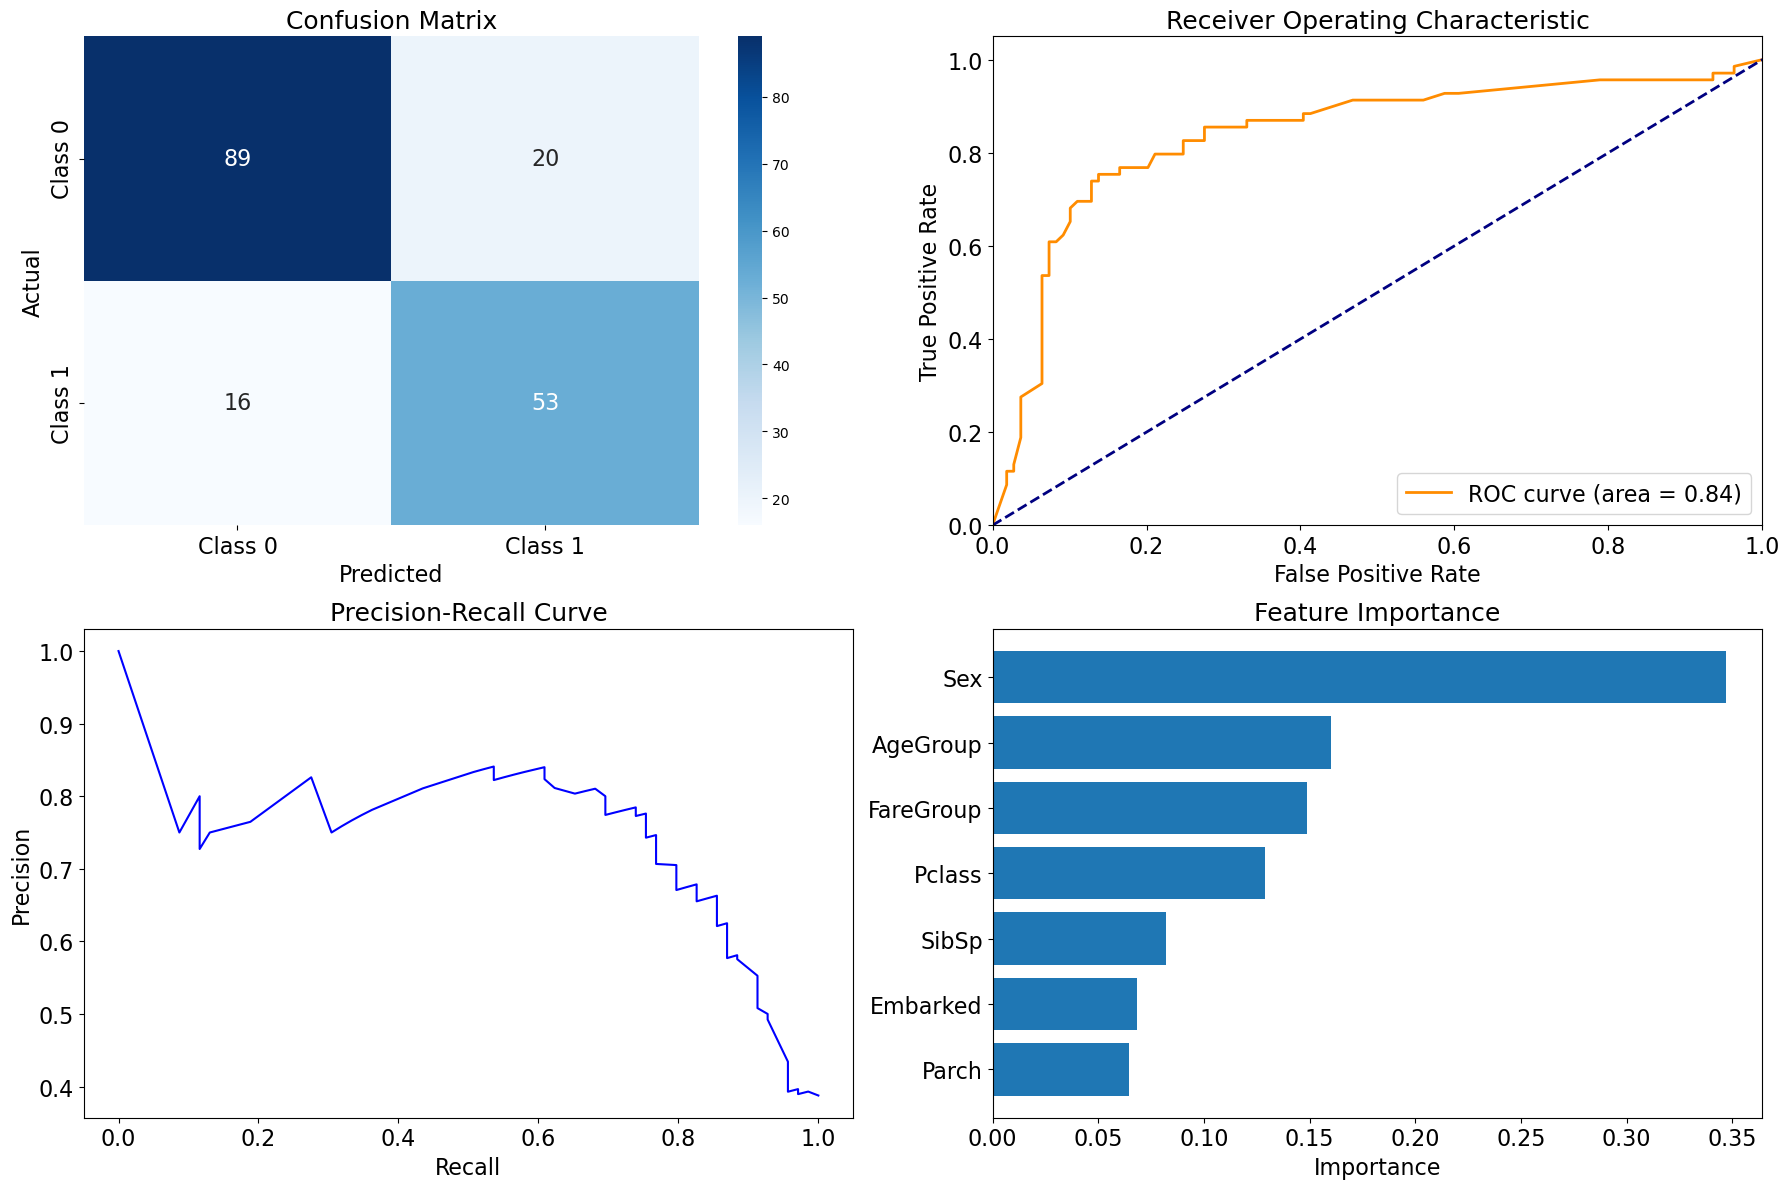

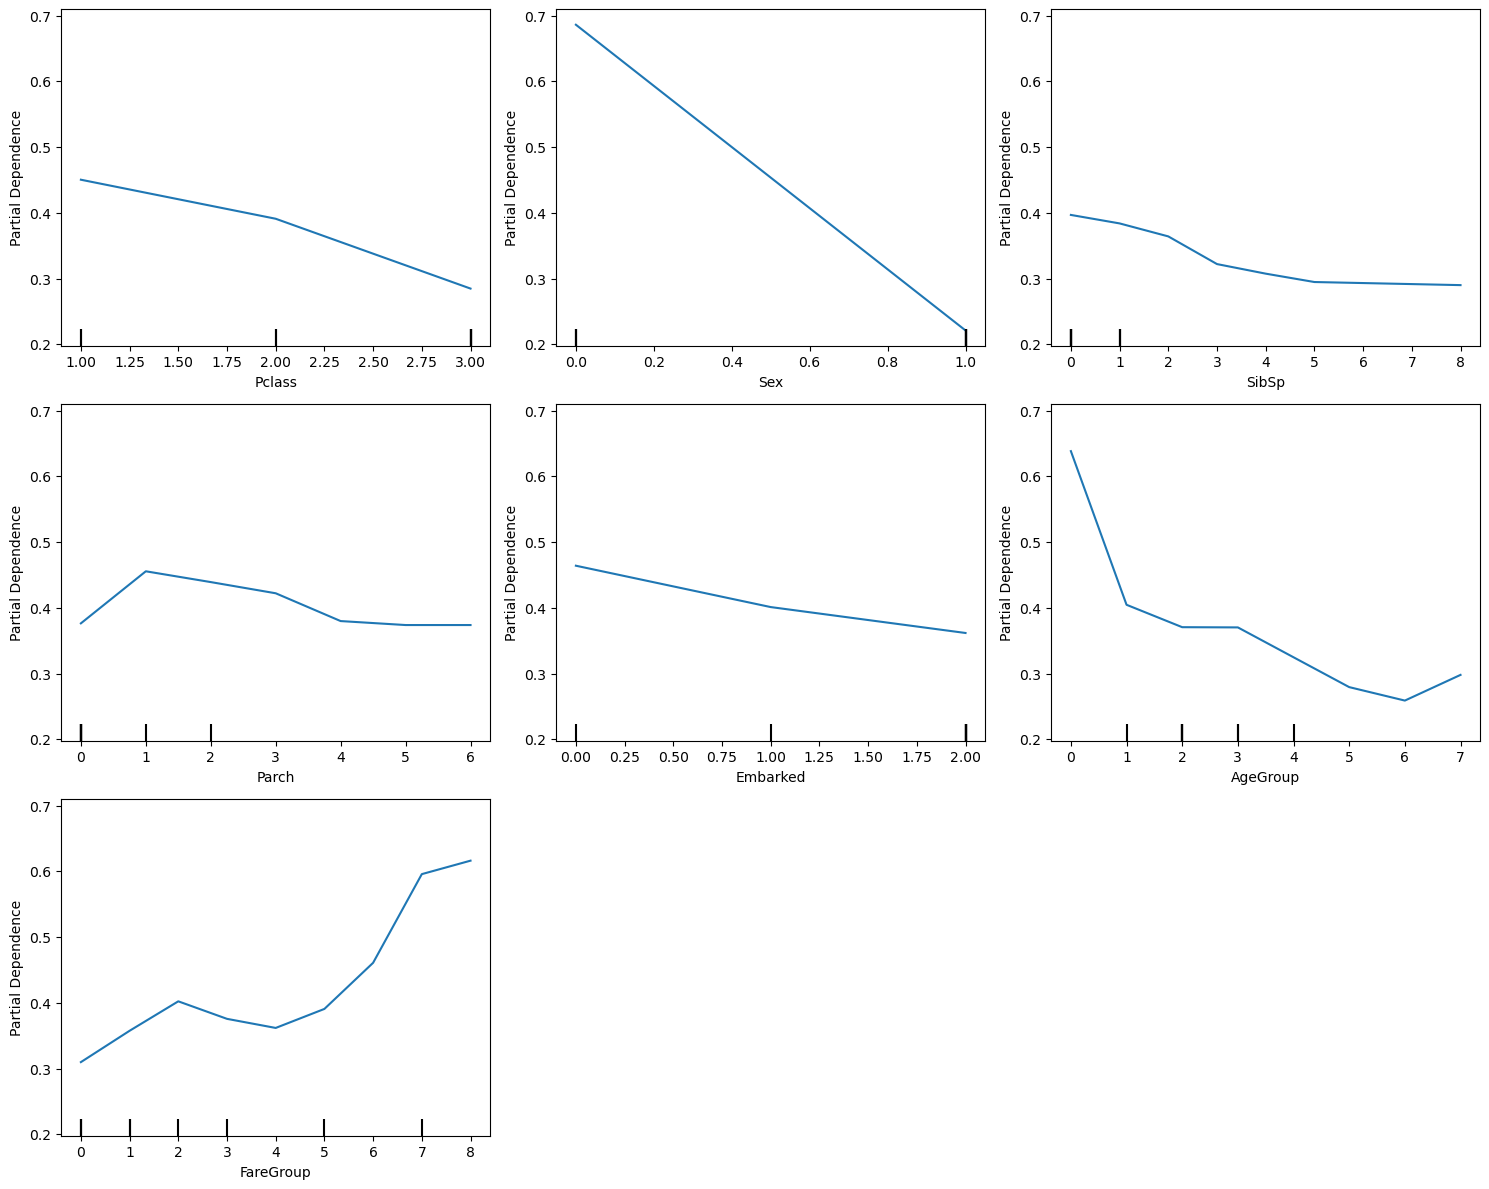

In [329]:
model = randomforest_V2
evaluate_model_performance_RF(model, X_val, y_val, X_train)

In [330]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": randomforest_V2.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_randomforest_V2.csv", index = False)

## Version 3: Feature Engineering V2

### Data processing

In [331]:
# load data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
test_ids = test["PassengerId"]

In [332]:
from sklearn import preprocessing

def label_encode_columns(df, columns):
    # Initialize the label encoder
    le = preprocessing.LabelEncoder()

    # Dictionary to store the mapping of original categories to their encoded values
    label_mapping = {}

    # Apply label encoding to the specified columns
    for col in columns:
        df[col] = le.fit_transform(df[col])
        
        # Store the mapping of the original categories to their encoded values
        label_mapping[col] = {class_label: index for index, class_label in enumerate(le.classes_)}

    # Display the transformation
    for col, mapping in label_mapping.items():
        print(f"'{col}' transformation:")
        for key, value in mapping.items():
            print(f"  {key} -> {value}")



In [333]:
# import strings
import re
from sklearn.ensemble import ExtraTreesRegressor

def data_process(df):
    # Calculate the mode value for 'Fare'
    fare_mode = df['Fare'].mode()[0]  # mode() returns a Series, get the first element
    # Replace NaN values in 'Fare' with the mode value
    df['Fare'].fillna(fare_mode, inplace=True)
    # Bin the fare data into ranges (e.g., 0-10, 10-20, etc.)
    # Zero fare is included in the first bin
    fare_bins = [-0.01, 25, 50, 100, 200, 300, 600]
    fare_labels = ['0-25', '25-50', '50-100', '100-200', '200-300', '300+']    
    df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=True)
    
    # Remove rows where the 'Embarked' column has missing values
    df.dropna(subset=['Embarked'], inplace=True)
    
    # Remove the 'Cabin' column from the DataFrame
    df.drop(columns=['Cabin'], inplace = True)

    # Create a new feature 'FamilySize'
    df['FamilySize'] = df["SibSp"] + df["Parch"]
    # Define the bins and labels
    bins = [-0.01, 3, 5, 11]  # Adjust the ranges as necessary
    labels = ['small', 'medium', 'large']   
    # Categorize FamilySize
    df['FamilySize'] = pd.cut(df['FamilySize'], bins=bins, labels=labels, right=False)

    # Define the regex pattern to match titles
    title_pattern = r'\b(Mrs|Mr|Master|Miss|Major|Rev|Dr|Ms|Mlle|Col|Capt|Mme|Countess|Don|Jonkheer|Dona)\b'   
    # Extract titles using the regex pattern
    df['Title'] = df['Name'].apply(lambda x: re.search(title_pattern, x).group(0) if re.search(title_pattern, x) else np.nan)    
    # Replace titles with Mr, Mrs, Miss, Master categories
    def replace_titles(title, sex):
        if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Countess', 'Mme', 'Dona']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms']:
            return 'Miss'
        elif title == 'Dr':
            return 'Mr' if sex == 'Male' else 'Mrs'
        else:
            return title
    # Apply the replacement function
    df['Title'] = df.apply(lambda x: replace_titles(x['Title'], x['Sex']), axis=1)
    
    classers = ["Sex", "Embarked", "FamilySize", "SibSp", "Title", "Parch", "Pclass", "FareGroup"]
    label_encode_columns(df, classers)
    age_et = ExtraTreesRegressor(n_estimators=200)    
    X_train = df.loc[df['Age'].notnull(),classers]
    Y_train = df.loc[df['Age'].notnull(),['Age']]
    X_test = df.loc[df['Age'].isnull(),classers]    
    age_et.fit(X_train,np.ravel(Y_train))
    age_predictions = age_et.predict(X_test)    
    df.loc[df['Age'].isnull(),['Age']] = age_predictions
    
    # Calculate the mode value for 'Age'
    # age_mode = df['Age'].mode()[0]  # mode() returns a Series, get the first element
    # # Replace NaN values in 'Age' with the mode value
    # df['Age'].fillna(age_mode, inplace=True)
    # Bin the age data into ranges (e.g., 0-10, 10-20, etc.)
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

    child_age = 12
    def get_life_phase(passenger):
        age, sex = passenger
        if (age < child_age):
            return 'child'
        elif (sex == 0):
            return 'female_adult'
        else:
            return 'male_adult'
    df['LifePhase'] = df[['Age', 'Sex']].apply(lambda row: get_life_phase(row),axis=1)

    # Drop unwanted columns if they exist
    columns_to_drop = ["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Age", "Fare"]
    existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]    
    if existing_columns_to_drop:
        df.drop(columns=existing_columns_to_drop, inplace=True)
        
data_process(train)
data_process(test)

'Sex' transformation:
  female -> 0
  male -> 1
'Embarked' transformation:
  C -> 0
  Q -> 1
  S -> 2
'FamilySize' transformation:
  large -> 0
  medium -> 1
  small -> 2
'SibSp' transformation:
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
  8 -> 6
'Title' transformation:
  Master -> 0
  Miss -> 1
  Mr -> 2
  Mrs -> 3
'Parch' transformation:
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
  6 -> 6
'Pclass' transformation:
  1 -> 0
  2 -> 1
  3 -> 2
'FareGroup' transformation:
  0-25 -> 0
  100-200 -> 1
  200-300 -> 2
  25-50 -> 3
  300+ -> 4
  50-100 -> 5
'Sex' transformation:
  female -> 0
  male -> 1
'Embarked' transformation:
  C -> 0
  Q -> 1
  S -> 2
'FamilySize' transformation:
  large -> 0
  medium -> 1
  small -> 2
'SibSp' transformation:
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
  8 -> 6
'Title' transformation:
  Master -> 0
  Miss -> 1
  Mr -> 2
  Mrs -> 3
'Parch' transformation:
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
  6 -> 6
  9 -> 

In [334]:
cols = ["AgeGroup", "LifePhase"]
label_encode_columns(train, cols)
label_encode_columns(test, cols)

'AgeGroup' transformation:
  0-10 -> 0
  10-20 -> 1
  20-30 -> 2
  30-40 -> 3
  40-50 -> 4
  50-60 -> 5
  60-70 -> 6
  70-80 -> 7
'LifePhase' transformation:
  child -> 0
  female_adult -> 1
  male_adult -> 2
'AgeGroup' transformation:
  0-10 -> 0
  10-20 -> 1
  20-30 -> 2
  30-40 -> 3
  40-50 -> 4
  50-60 -> 5
  60-70 -> 6
  70-80 -> 7
'LifePhase' transformation:
  child -> 0
  female_adult -> 1
  male_adult -> 2


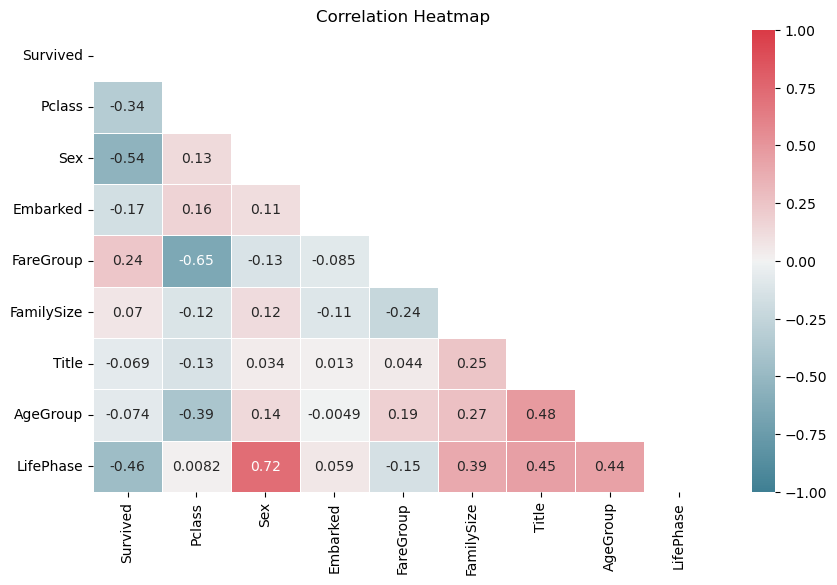

In [335]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), 
            mask=np.triu(np.ones_like(train.corr(), dtype=bool)),
            annot=True, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            vmax=1,
            vmin=-1, 
            linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

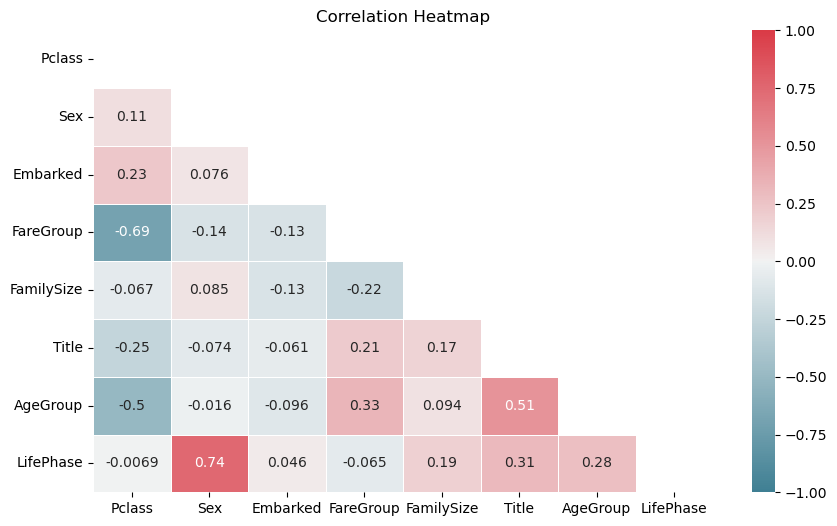

In [336]:
plt.figure(figsize=(10,6))
sns.heatmap(test.corr(), 
            mask=np.triu(np.ones_like(test.corr(), dtype=bool)),
            annot=True, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            vmax=1,
            vmin=-1, 
            linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Logistic regression¶

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler

# Define target and features
y = train["Survived"]
X = train.drop("Survived", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

LogitReg_V3 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

Coefficients with corresponding features:
Pclass: -0.998814607123604
Sex: -1.479204690551439
Embarked: -0.24210853709753488
FareGroup: 0.09714205323148424
FamilySize: 1.41067750768233
Title: 0.2189166238979765
AgeGroup: -0.22969214774916277
LifePhase: -1.3815211545501764
Coefficients: [[-0.99881461 -1.47920469 -0.24210854  0.09714205  1.41067751  0.21891662
  -0.22969215 -1.38152115]]
Intercept: [1.52835386]
Accuracy: 0.8258
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       109
           1       0.76      0.81      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



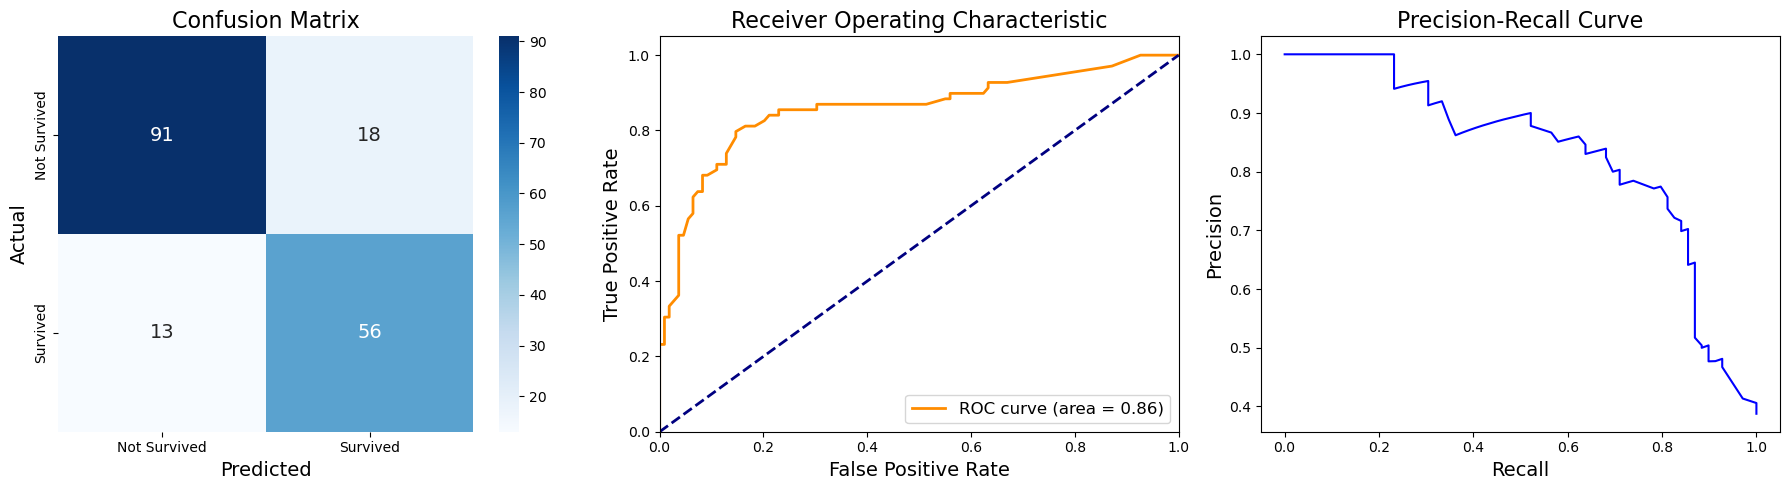

In [338]:
model = LogitReg_V3
evaluate_logistic_model(model, X_val, y_val)

In [339]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": LogitReg_V3.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_LogitReg_V3.csv", index = False)

### XGradientBoost

Accuracy: 0.8258
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       109
           1       0.78      0.77      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



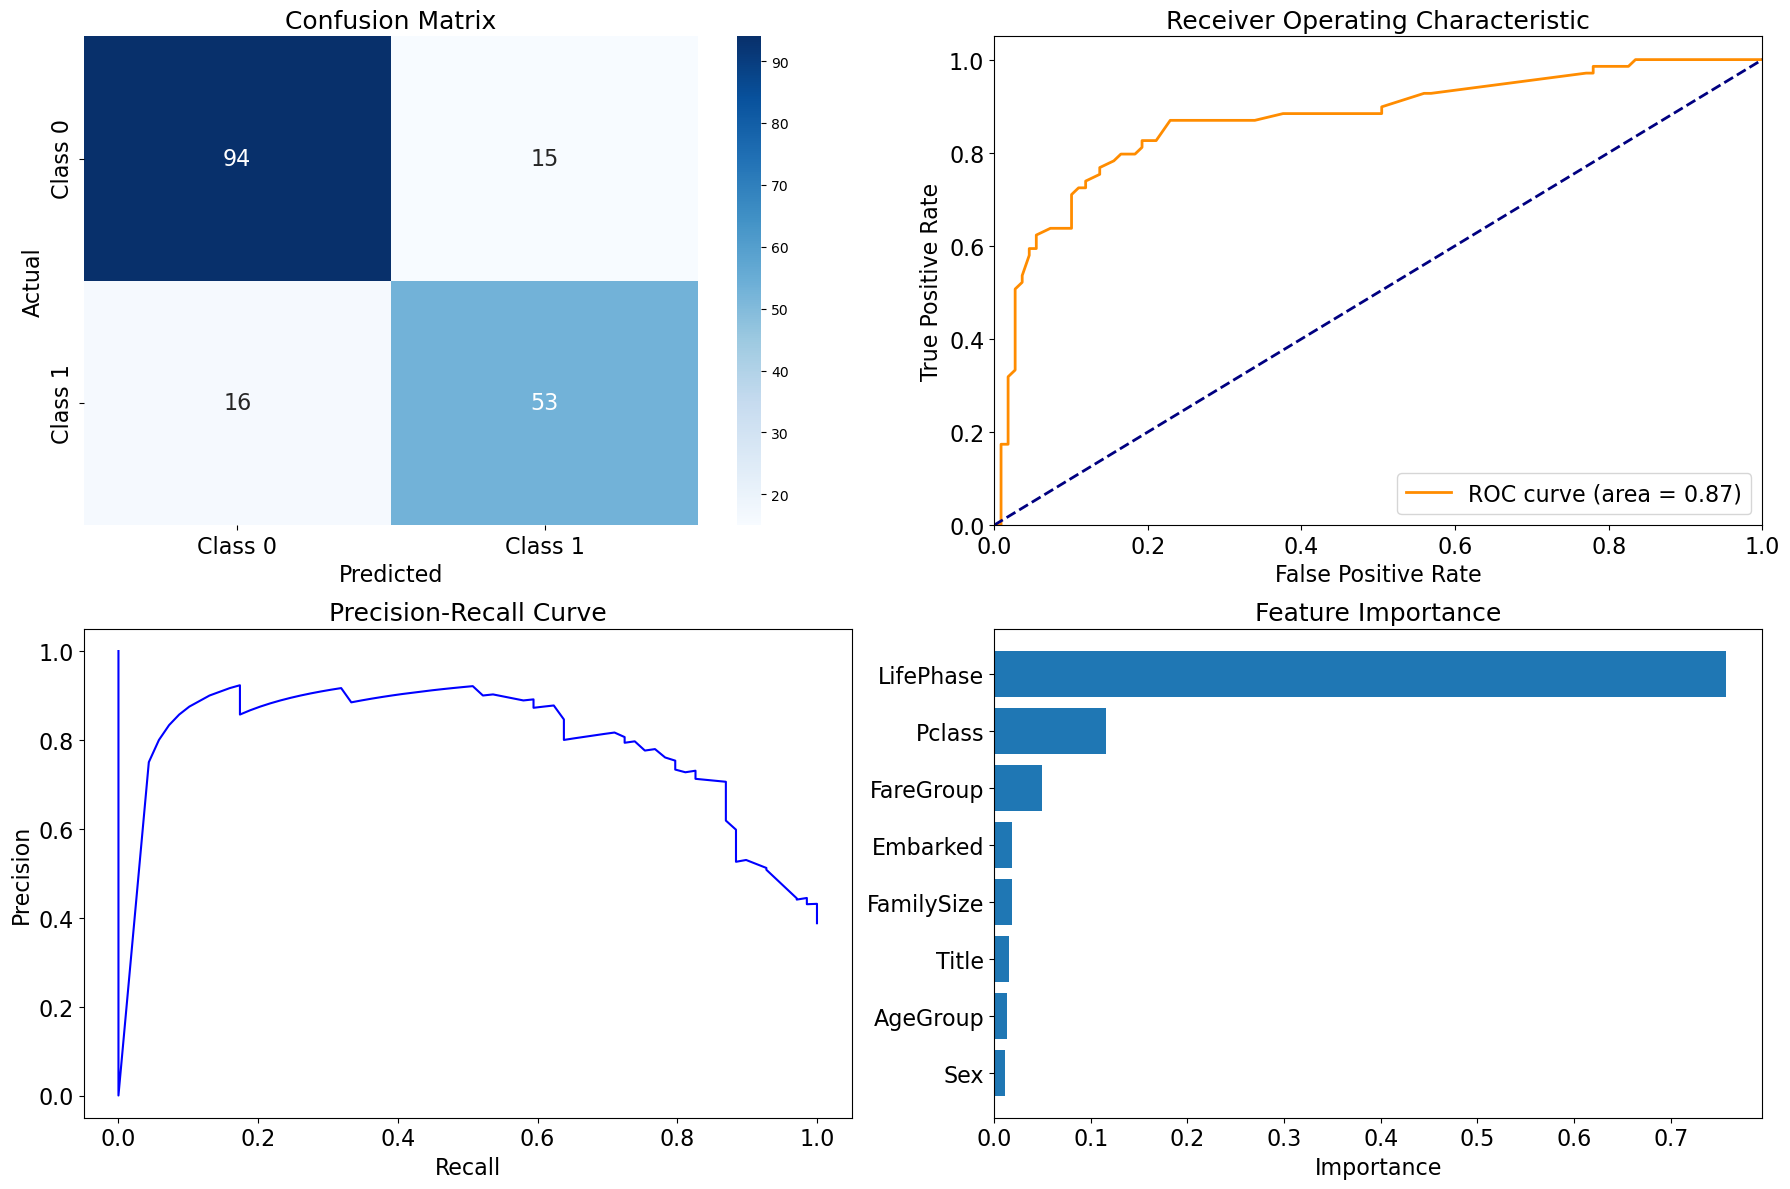

In [340]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_V3 = XGBClassifier(random_state=0, eval_metric='logloss')
xgb_V3.fit(X_train, y_train)

model = xgb_V3
evaluate_model_performance_GB(model, X_val, y_val)



In [341]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": xgb_V3.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_xgb_V3.csv", index = False)

### Support Vector Classifier (SVC)

In [342]:
from sklearn.svm import SVC

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to NumPy arrays (if not already done)
X_train_scaled = X_train_scaled.astype(float)
X_val_scaled = X_val_scaled.astype(float)

# Initialize the Support Vector Classifier
svc_V3 = SVC(kernel='linear', random_state=42)

# Fit the model on the scaled training data
svc_V3.fit(X_train, y_train)

# Predict on the validation data
y_pred = svc_V3.predict(X_val)

In [343]:
# Fit the model on the scaled training data
svc_V3.fit(X_train_scaled, y_train)

# Predict on the validation data
y_pred = svc_V3.predict(X_val_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[92 17]
 [16 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       109
           1       0.76      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.81       178



In [344]:
# Scale the new data using the same scaler
test_scaled = scaler.transform(test)

df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": svc_V3.predict(test_scaled)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_svc_V3.csv", index = False)

### Random forest

Accuracy: 0.8315
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       109
           1       0.87      0.67      0.75        69

    accuracy                           0.83       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.84      0.83      0.83       178



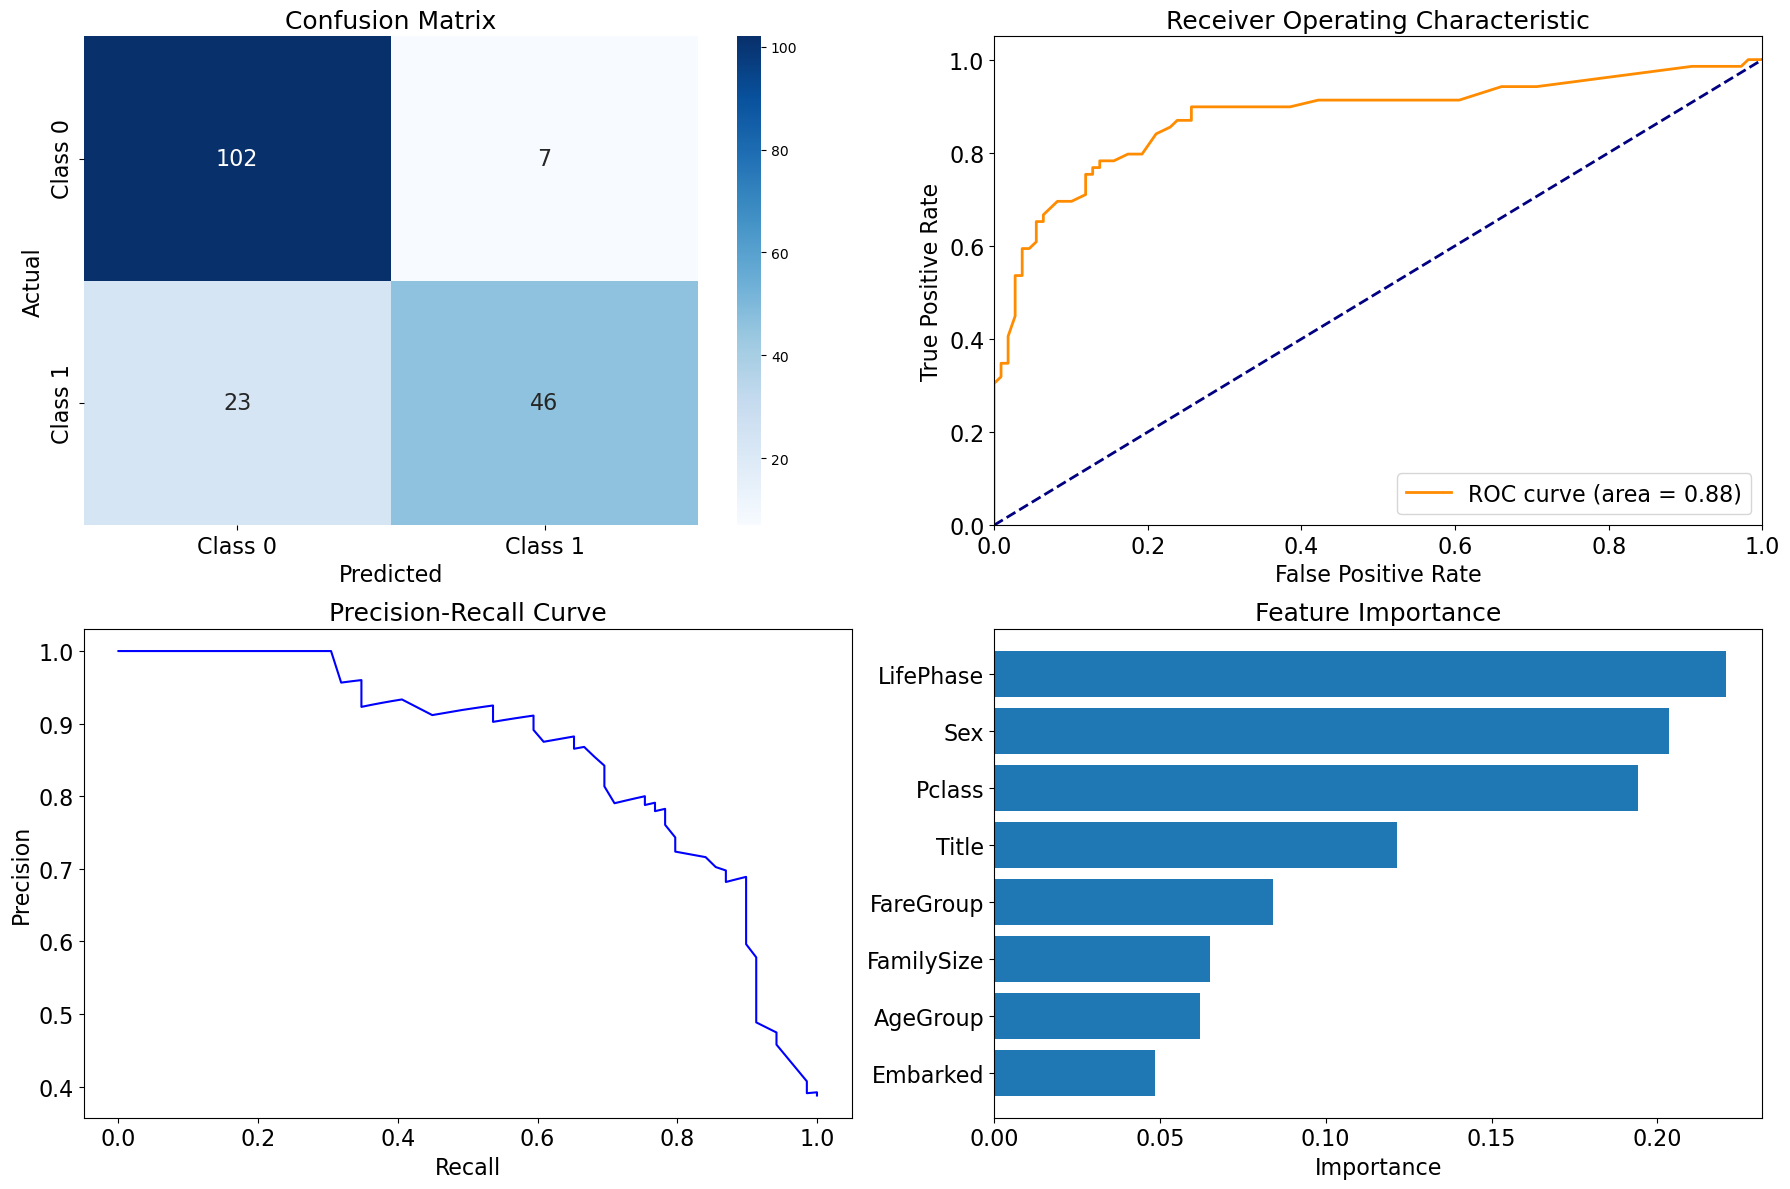

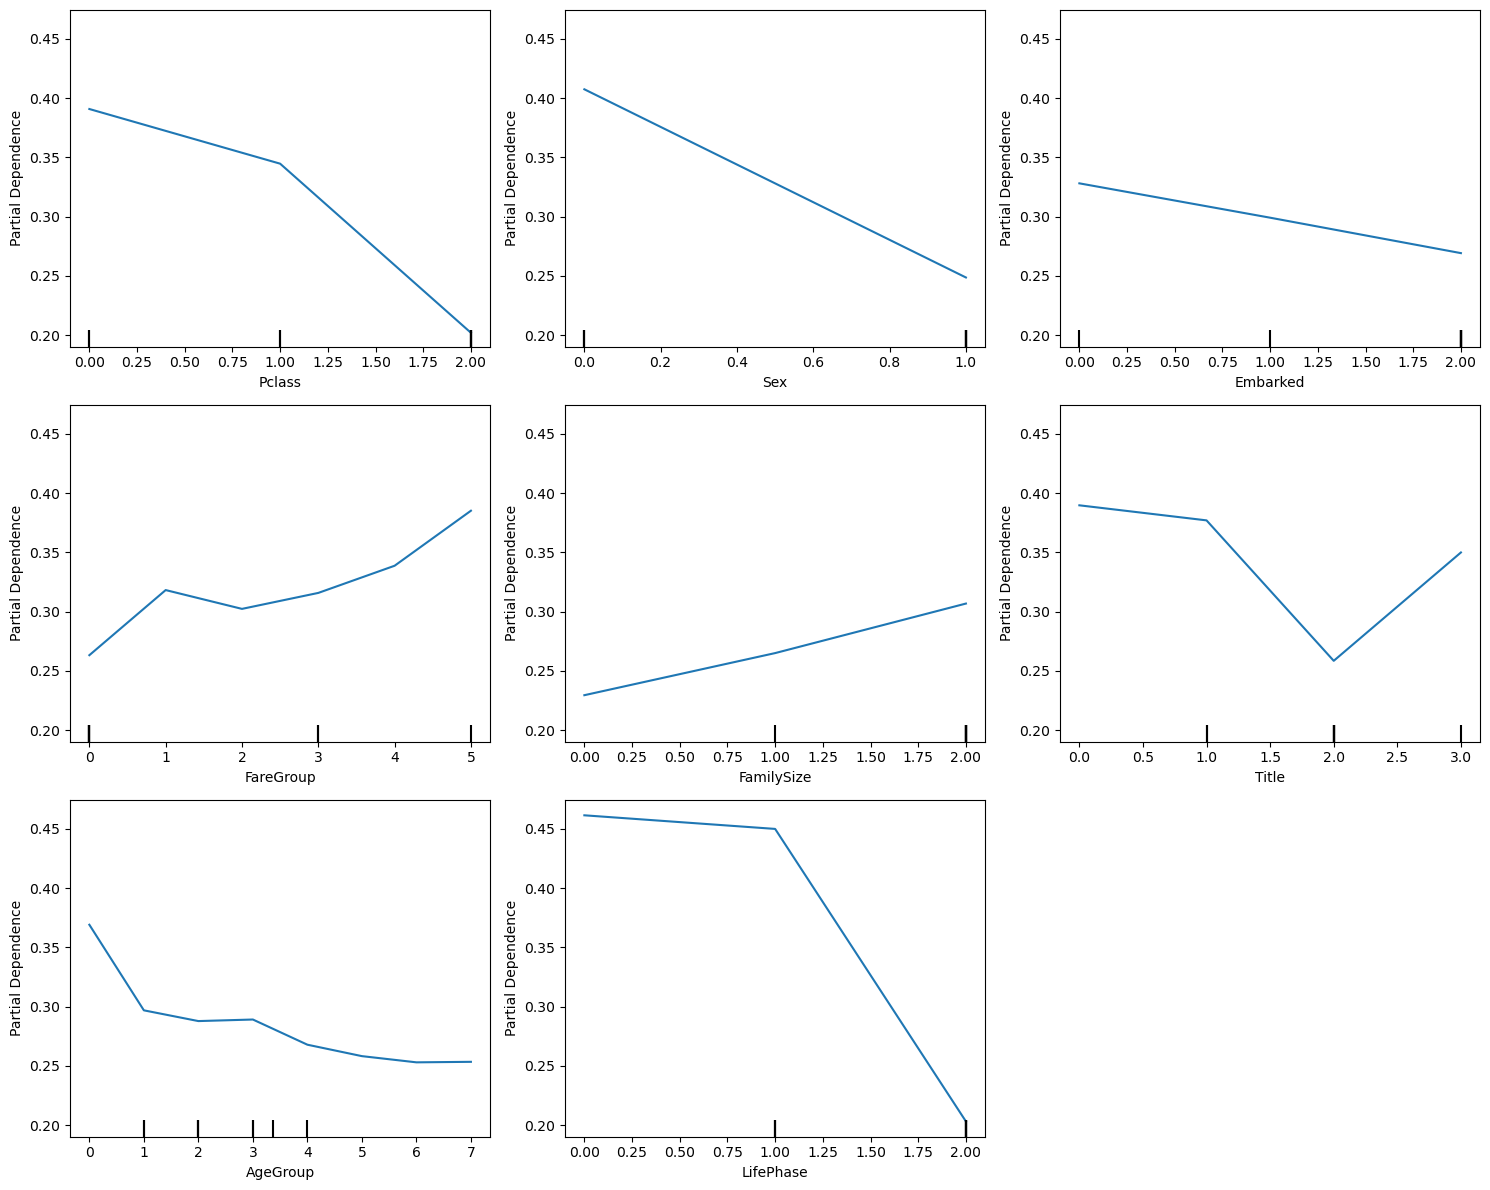

In [345]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
randomforest_V3 = RandomForestClassifier(n_estimators=20000, random_state=42, min_samples_leaf=4, class_weight={0:0.72,1:0.28})
randomforest_V3.fit(X_train, y_train)

model = randomforest_V3
evaluate_model_performance_RF(model, X_val, y_val, X_train)

In [346]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": randomforest_V3.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_randomforest_V3.csv", index = False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
randomforest_V3 = RandomForestClassifier(n_estimators=20000, random_state=42, min_samples_leaf=4)
randomforest_V3.fit(X_train, y_train)

model = randomforest_V3
evaluate_model_performance_RF_GB(model, X_val, y_val)

In [ ]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": randomforest_V3.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_randomforest_V3_tuned.csv", index = False)

## Version 4: Hyperparameter Tuning- Cross Validation

In [ ]:
# load data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
test_ids = test["PassengerId"]

data_process(train)
data_process(test)

cols = ["AgeGroup", "LifePhase"]
label_encode_columns(train, cols)
label_encode_columns(test, cols)

#### Grid search

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Define target and features
y = train["Survived"]
X = train.drop("Survived", axis = 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier with the initial parameters
initial_model = RandomForestClassifier(random_state=42)
initial_model.fit(X_train, y_train)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=initial_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict on the validation set
best_model = grid_search.best_estimator_
evaluate_model_performance_RF_GB(best_model, X_val, y_val)

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Average cross-validation score: ", np.mean(cv_scores))


In [ ]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": best_model.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_randomforest_V4.csv", index = False)

#### Randomised search

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Define target and features
y = train["Survived"]
X = train.drop("Survived", axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier with initial parameters
initial_model = RandomForestClassifier(random_state=42)
initial_model.fit(X_train, y_train)

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(1000, 10000),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=initial_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of random parameter settings to try
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters from the random search
print("Best parameters found: ", random_search.best_params_)

# Use the best model to predict on the validation set
best_model = random_search.best_estimator_
evaluate_model_performance_RF_GB(best_model, X_val, y_val)

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Average cross-validation score: ", np.mean(cv_scores))


In [ ]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": best_model.predict(test)
                  })
# Save the DataFrame to a CSV file in the 'Submissions' folder
df.to_csv("Submissions/Submission_randomforest_V4_rand.csv", index = False)